In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns
from scipy.optimize import fsolve
import scipy as sp

# Constants

r=0.9
D1=4
D2=4.8
q1=0.8
mu=0.05
q2=0.9
c=0.05
B=5
phi1=0.1
phi2=0.15
p=0.05

# Vary K, $\lambda$ ,$\tau$ and A

𝐾 = 5
lam = 0.04 
tau= 0.5
A=0.9
var=[K,lam,tau,A]


# The 4th fixed point (The endemic Fixed point)

def endemicfixed_point(u,K,lam,tau,A):
    X = u[0]
    Y = u[1]
    H = u[2]
    P = u[3]
    
    eq_X = r*(1-(X+Y)/K)-lam*Y-q1*H/(X+D1)
    eq_Y = lam*X - mu - q2*H/(Y+D2)
    eq_H = q1*(P-tau)*X/(X+D1) + q2*(p-tau)*Y/(Y+D2) - c
    eq_P = A/(1+B*P) - q1*X*H/(X+D1)
    
    return [eq_X, eq_Y, eq_H, eq_P]

## Changing Aine's slightly

def J(X,Y,H,P,K,lam,tau,A):
    y=np.zeros((4,4))
    y[0,0]= -r*X/K + q1*X*H/(X+D1)**2
    y[0,1]= -r*X/K - X*lam
    y[0,2]= -q1*X/(X+D1)
    y[0,3]= 0
    y[1,0]= lam*Y
    y[1,1]= q2*Y*H/(Y+D2)**2
    y[1,2]= - q2*Y/(Y+D2)
    y[1,3]= 0
    y[2,0]= phi1*H*((q1*(P-tau))/(D1+X)-(q1*X*(P-tau))/(D1+X)**2)
    y[2,1]= phi1*H*((q2*(p-tau))/(D2+Y)-(q2*Y*(p-tau))/(D2+Y)**2)
    y[2,2]= 0
    y[2,3]= phi1*q1*H*X/(X+D1)
    y[3,0]= P*phi2*((H*q1*X)/(X+D1)**2-H*q1/(D1+X))
    y[3,1]= 0
    y[3,2]= -phi2*q1*P*X/(X+D1)
    y[3,3]= -phi2*A*B*P/(1+B*P)**2
    return y

# Analysis on $\tau$

C:\Users\seanw\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\seanw\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[-9.00099494e-01+0.j         -1.47271902e-05+0.j
 -1.30510347e-02+0.02586335j -1.30510347e-02-0.02586335j]


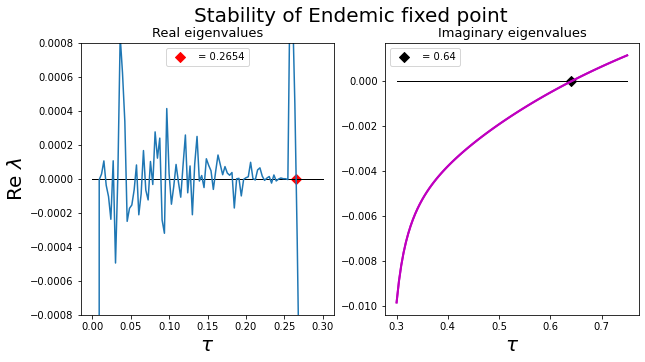

In [70]:
## Point where becomes stable is tau = 0.2654 

tau = 0.24
K = 5
lam = 0.04 
A = 0.9

fp = fsolve(endemicfixed_point, [2,2,1,1],args=(K,lam,tau,A))
print(np.linalg.eig(J(fp[0],fp[1],fp[2],fp[3],K,lam,tau,A))[0])

n=100
tau_range=np.linspace(0.3,.75,n)
eigs_real = np.zeros((n,2))
eigs_imag = np.zeros((n,2))
i=0
for tau in tau_range:
    fp = fsolve(endemicfixed_point, [2,2,1,1],args=(K,lam,tau,A))
    eigs=np.linalg.eig(J(fp[0],fp[1],fp[2],fp[3],K,lam,tau,A))[0]
    eigs_real[i,0] = eigs[eigs.imag>0].real
    eigs_imag[i,0] = eigs[eigs.imag>0].imag
    eigs_real[i,1] = eigs[eigs.imag<0].real
    eigs_imag[i,1] = eigs[eigs.imag<0].imag
    i+=1

n=100
tau_range2=np.linspace(0,.3,n)
eigs_real2 = np.zeros((n,2))
i=0
for tau in tau_range2:
    fp = fsolve(endemicfixed_point, [2,2,1,1],args=(K,lam,tau,A))
    eigs=np.linalg.eig(J(fp[0],fp[1],fp[2],fp[3],K,lam,tau,A))[0]
    eigs_real2[i,0] = eigs[eigs.imag==0][0].real
    eigs_real2[i,1] = eigs[eigs.imag==0][1].real
    i+=1

fig,axs=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Stability of Endemic fixed point',size=20)
axs[1].plot(tau_range,np.zeros(n),'k',linewidth=1)
axs[1].plot(tau_range,eigs_real[:,0],'m',linewidth=2)
axs[1].plot(tau_range,eigs_real[:,1],'m',linewidth=2)
axs[0].set_ylabel('Re $\lambda$',size=20)
axs[1].set_xlabel('$\\tau$',size=20)
axs[0].plot(tau_range2,np.zeros(n),'k',linewidth=1)
axs[0].plot(tau_range2,eigs_real2[:,1])
axs[0].set_ylim((-0.0008,0.0008))
axs[1].set_title('Imaginary eigenvalues',size=13)
axs[0].set_title('Real eigenvalues',size=13)
axs[0].set_xlabel('$\\tau$',size=20)
axs[0].scatter(0.2654,0, c='red', marker='D',label='= 0.2654', s=50)
axs[1].scatter(0.64,0,c='black', marker='D',label='= 0.64', s=50)
axs[0].legend(loc='upper center')
axs[1].legend()
#plt.savefig('Stability of endemic varying tau')

In [71]:
# The third disease free fixed point

def J(X,Y,H,P,K,lam,tau,A):
    y=np.zeros((4,4))
    y[0,0]= -r*X/K + q1*X*H/(X+D1)**2
    y[0,1]= -r*X/K - X*lam
    y[0,2]= -q1*X/(X+D1)
    y[0,3]= 0
    y[1,0]= 0
    y[1,1]= (-H*q2)/D2+lam*X-mu
    y[1,2]= 0
    y[1,3]= 0
    y[2,0]= phi1*H*((q1*(P-tau))/(D1+X)-(q1*X*(P-tau))/(D1+X)**2)
    y[2,1]= phi1*H*((q2*(p-tau))/(D2+Y)-(q2*Y*(p-tau))/(D2+Y)**2)
    y[2,2]= 0
    y[2,3]= phi1*q1*H*X/(X+D1)
    y[3,0]= P*phi2*((H*q1*X)/(X+D1)**2-H*q1/(D1+X))
    y[3,1]= 0
    y[3,2]= -phi2*q1*P*X/(X+D1)
    y[3,3]= -phi2*A*B*P/(1+B*P)**2
    return y

def disfreefixed_point1(K,lam,tau,A):
    X=(K*q1*r + B*r*(c*(-D1+K)+K*q1*tau)-np.sqrt(r*(r*(B*c*(D1 + K) + K*q1 + B*K*q1*tau)**2 - 
   4*A*K*q1*(q1 + B*(c + q1*tau)))))/(2*r*(q1 + B*(c + q1*tau)))
    Y=0
    H=r/q1*(1-X/K)*(X+D1)
    P=((A/(r*X*(1-X/K))-1)*1/B)
    return [X,Y,H,P]
disfreefixed_point1(K,lam,tau,A)


def disfreefixed_point2(K,lam,tau,A):
    X=(K*q1*r + B*r*(c*(-D1+K)+K*q1*tau)+np.sqrt(r*(r*(B*c*(D1 + K) + K*q1 + B*K*q1*tau)**2 - 
   4*A*K*q1*(q1 + B*(c + q1*tau)))))/(2*r*(q1 + B*(c + q1*tau)))
    Y=0
    H=r/q1*(1-X/K)*(X+D1)
    P=((A/(r*X*(1-X/K))-1)*1/B)
    return [X,Y,H,P]

# plt.figure()
# for tau in np.linspace(0,1,100):
#     fp = disfreefixed_point2(K,lam,tau,A)
#     plt.scatter(tau,fp[0],color='b')
#     plt.scatter(tau,fp[1],color='g')
#     plt.scatter(tau,fp[2],color='r')
#     plt.scatter(tau,fp[3],color='k')

## Point where becomes stable is tau = 0.2654 

K = 5
lam = 0.04 
A = 0.9

fp2=disfreefixed_point2(K,lam,tau,A)
print(np.linalg.eig(J(fp2[0],fp2[1],fp2[2],fp2[3],K,lam,tau,A))[0])

fp1=disfreefixed_point1(K,lam,tau,A)
print(np.linalg.eig(J(fp1[0],fp1[1],fp1[2],fp1[3],K,lam,tau,A))[0])

[-0.80321989+0.j         -0.01490557+0.02322555j -0.01490557-0.02322555j
  0.00871131+0.j        ]
[ 0.00309678+0.0673531j  0.00309678-0.0673531j  0.00298619+0.j
 -0.89315575+0.j       ]


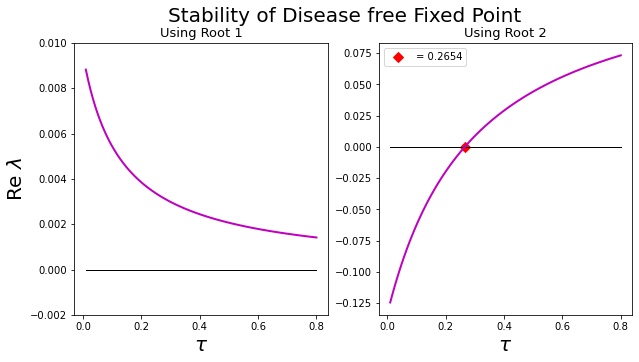

In [72]:
n=100
tau_range=np.linspace(0.01,0.8,n)
eigs_real = np.zeros((n,2))
i=0
for tau in tau_range:
    fp = disfreefixed_point2(K,lam,tau,A)
    eigs=np.linalg.eig(J(fp[0],fp[1],fp[2],fp[3],K,lam,tau,A))[0]
    eigs_real[i,0] = eigs[eigs.imag==0][0].real
    eigs_real[i,1] = eigs[eigs.imag==0][1].real
    i+=1
n=100
eigs_real2 = np.zeros((n,2))
i=0
for tau in tau_range:
    fp = disfreefixed_point1(K,lam,tau,A)
    eigs=np.linalg.eig(J(fp[0],fp[1],fp[2],fp[3],K,lam,tau,A))[0]
    eigs_real2[i,0] = eigs[eigs.imag==0][0].real
    eigs_real2[i,1] = eigs[eigs.imag==0][1].real
    i+=1    

    
fig,axs=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Stability of Disease free Fixed Point',size=20)
#fig.suptitle('Investigating the region of Stability',size=15)
axs[1].plot(tau_range,np.zeros(n),'k',linewidth=1)
axs[1].plot(tau_range,eigs_real[:,1],'m',linewidth=2)
axs[0].plot(tau_range,np.zeros(n),'k',linewidth=1)
axs[0].plot(tau_range,eigs_real2[:,0],'m',linewidth=2)
axs[0].set_xlabel('$\\tau$',size=20)
axs[0].set_ylabel('Re $\lambda$',size=20)
axs[1].set_xlabel('$\\tau$',size=20)
axs[0].set_title('Using Root 1',size=13)
axs[0].set_ylim((-0.002,0.01))
axs[1].set_title('Using Root 2',size=13)
axs[1].scatter(0.2654,0, c='red', marker='D',label='= 0.2654', s=50)
axs[1].legend()
#plt.savefig('Disease free Equilibrium stablity with tau')

Text(0.5, 1.0, 'Bifurcation Diagram of $\\tau$')

<Figure size 432x288 with 0 Axes>

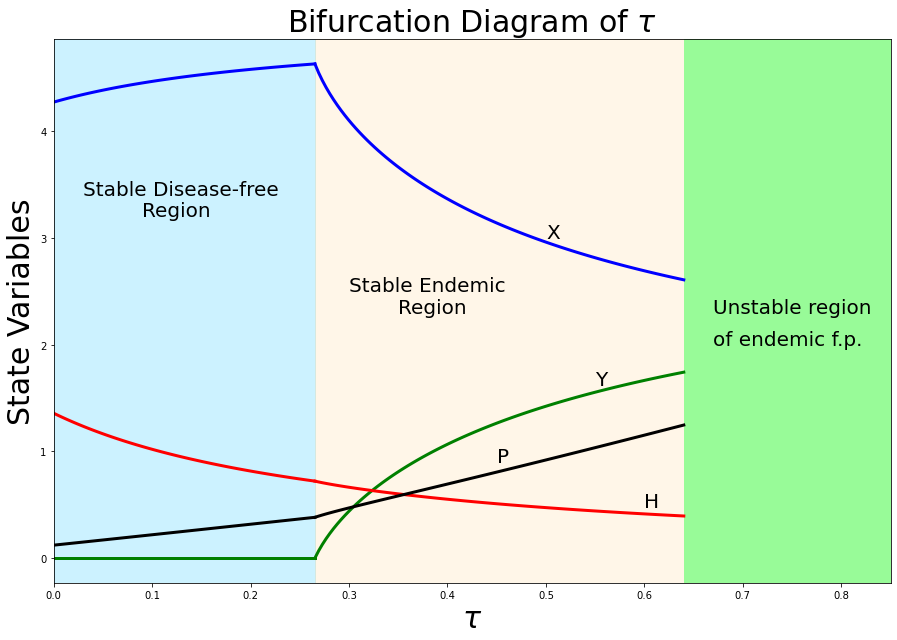

In [73]:
plt.figure()
diseasefreevals=np.zeros((100,4))
endemicvals=np.zeros((100,4))
tauvals1=np.linspace(0,0.2654,100)
tauvals2=np.linspace(0.2654,0.64,100)
i=0
for tau in np.linspace(0,0.2654,100):
    fp = disfreefixed_point2(K,lam,tau,A)
    diseasefreevals[i,0]=fp[0]
    diseasefreevals[i,1]=fp[1]
    diseasefreevals[i,2]=fp[2]
    diseasefreevals[i,3]=fp[3]
    i+=1
i=0
for tau in np.linspace(0.2654,0.64,100):
    fp = fsolve(endemicfixed_point, [2,2,1,1],args=(K,lam,tau,A))
    endemicvals[i,0]=fp[0]
    endemicvals[i,1]=fp[1]
    endemicvals[i,2]=fp[2]
    endemicvals[i,3]=fp[3]
    i+=1
    
    
plt.figure(figsize=(15,10))
linew=3
plt.plot(tauvals1,diseasefreevals[:,0],lw=linew,color='b')
plt.plot(tauvals1,diseasefreevals[:,1],lw=linew,color='g')
plt.plot(tauvals1,diseasefreevals[:,2],lw=linew,color='r')
plt.plot(tauvals1,diseasefreevals[:,3],lw=linew,color='k')
plt.plot(tauvals2,endemicvals[:,0],lw=linew,color='b')
plt.plot(tauvals2,endemicvals[:,1],lw=linew,color='g')
plt.plot(tauvals2,endemicvals[:,2],lw=linew,color='r')
plt.plot(tauvals2,endemicvals[:,3],lw=linew,color='k')
plt.xlim((0,0.85))
plt.axvspan(tauvals1[0], tauvals1[99], color='deepskyblue', alpha=0.2)
plt.axvspan(tauvals2[0], tauvals2[99], color='moccasin', alpha=0.3)
plt.axvspan(tauvals2[99],0.85,color='palegreen')
plt.text(0.67,2.3,'Unstable region',size=20)
plt.text(0.67,2,'of endemic f.p.',size=20)
plt.text(0.5,3,'X',size=20)
plt.text(0.55,1.625,'Y',size=20)
plt.text(0.45,0.9,'P',size=20)
plt.text(0.6,0.48,'H',size=20)
plt.text(0.3,2.5,'Stable Endemic',size=20)
plt.text(0.35,2.3,'Region',size=20)
plt.text(0.03,3.4,'Stable Disease-free',size=20)
plt.text(0.09,3.2,'Region',size=20)
plt.ylabel('State Variables',size=30)
plt.xlabel('$\\tau$',size=30)
plt.title('Bifurcation Diagram of $\\tau$',size=30)
#plt.savefig('tau Bifurcation')

Text(0.5, 1.0, 'Revenue changing with $\\tau$')

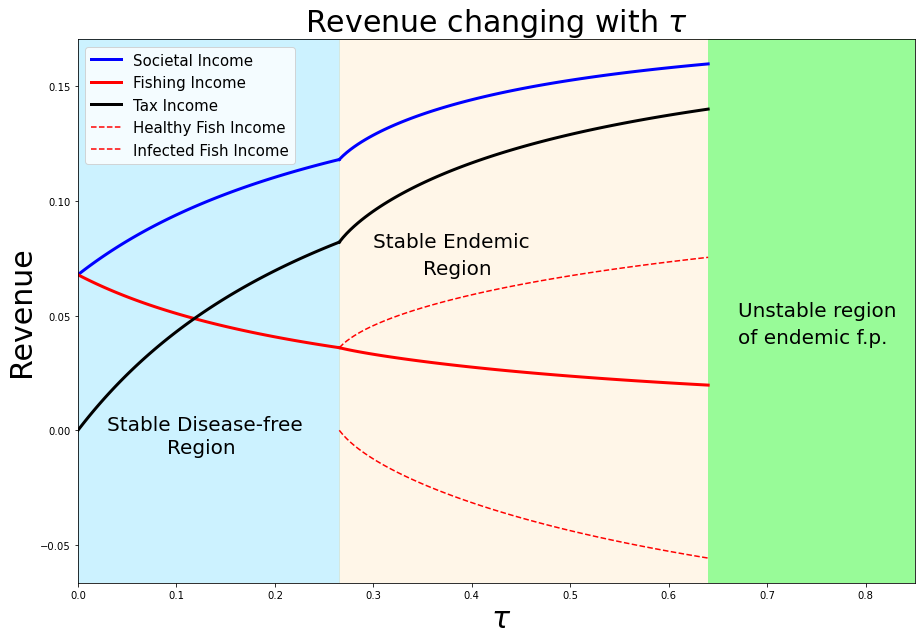

In [74]:
K = 5
lam = 0.04 
A = 0.9


# Societal Income = Earning from fishing less tax plus earning from tax

def SocietalIncome(X,Y,H,P,tau):
    return (q1*P*X/(X+D1)+q2*p*Y/(Y+D2))*H

def Incomelesstax(X,Y,H,P,tau):
    return (q1*(P-tau)*X/(X+D1)+q2*(p-tau)*Y/(Y+D2))*H

def taxearnings(X,Y,H,P,tau):
    return (q1*tau*X/(X+D1)+q2*tau*Y/(Y+D2))*H

def Incomehealthyfish(X,Y,H,P,tau):
    return q1*(P-tau)*X*H/(X+D1)

def Incomeinfectedfish(X,Y,H,P,tau):
    return q2*(p-tau)*Y*H/(Y+D2)

endemicvals=np.zeros((100,5))
plt.figure(figsize=(15,10))
i=0
taurange1=np.linspace(0.2654 ,0.64,100)
for tau in np.linspace(0.2654 ,0.64,100):
    fp = fsolve(endemicfixed_point, [2,2,1,1],args=(K,lam,tau,A))
    SI=SocietalIncome(fp[0],fp[1],fp[2],fp[3],tau)
    ILT=Incomelesstax(fp[0],fp[1],fp[2],fp[3],tau)
    TI=taxearnings(fp[0],fp[1],fp[2],fp[3],tau)
    IHF=Incomehealthyfish(fp[0],fp[1],fp[2],fp[3],tau)
    IIF=Incomeinfectedfish(fp[0],fp[1],fp[2],fp[3],tau)
    endemicvals[i,0]=SI
    endemicvals[i,1]=ILT
    endemicvals[i,2]=TI
    endemicvals[i,3]=IHF
    endemicvals[i,4]=IIF
#     plt.scatter(tau,SI,color='b')
#     plt.scatter(tau,ILT,color='r')
#     plt.scatter(tau,TI,color='g')
#     plt.scatter(tau,IHF,color='r',s=2)
#     plt.scatter(tau,IIF,color='r',s=2)
    i+=1
    
taurange2=np.linspace(0,0.2654,100)
diseasefreevals=np.zeros((100,3))
i=0
for tau in np.linspace(0,0.2654,100):
    fp2= disfreefixed_point2(K,lam,tau,A)
    SI2=SocietalIncome(fp2[0],fp2[1],fp2[2],fp2[3],tau)
    ILT2=Incomelesstax(fp2[0],fp2[1],fp2[2],fp2[3],tau)
    TI2=taxearnings(fp2[0],fp2[1],fp2[2],fp2[3],tau)
#     plt.scatter(tau,SI2,color='b')
#     plt.scatter(tau,ILT2,color='r')
#     plt.scatter(tau,TI2,color='g')
    diseasefreevals[i,0]=SI2
    diseasefreevals[i,1]=ILT2
    diseasefreevals[i,2]=TI2
    i+=1
    
linew=3
plt.plot(taurange1,endemicvals[:,0],label='Societal Income',color='b',lw=linew)
plt.plot(taurange1,endemicvals[:,1],label='Fishing Income',color='r',lw=linew)
plt.plot(taurange1,endemicvals[:,2],label='Tax Income',color='black',lw=linew)
plt.plot(taurange1,endemicvals[:,3],label='Healthy Fish Income',color='r',linestyle='dashed')
plt.plot(taurange1,endemicvals[:,4],label='Infected Fish Income',color='r',linestyle='dashed')
plt.plot(taurange2,diseasefreevals[:,0],color='b',lw=linew)
plt.plot(taurange2,diseasefreevals[:,1],color='r',lw=linew)
plt.plot(taurange2,diseasefreevals[:,2],color='black',lw=linew)
plt.axvspan(taurange2[0], taurange2[99], color='deepskyblue', alpha=0.2)
plt.axvspan(taurange1[0], taurange1[99], color='moccasin', alpha=0.3)
plt.axvspan(taurange1[99],0.85,color='palegreen')
plt.xlim((0,0.85))
plt.legend(prop = { "size": 15 })
plt.text(0.67,0.05,'Unstable region',size=20)
plt.text(0.67,0.038,'of endemic f.p.',size=20)
plt.text(0.3,0.08,'Stable Endemic',size=20)
plt.text(0.35,0.068,'Region',size=20)
plt.text(0.03,0,'Stable Disease-free',size=20)
plt.text(0.09,-0.01,'Region',size=20)
plt.ylabel('Revenue',size=30)
plt.xlabel(' $\\tau$',size=30)
plt.title('Revenue changing with $\\tau$',size=30)
#plt.savefig('Revenue varied with tau')

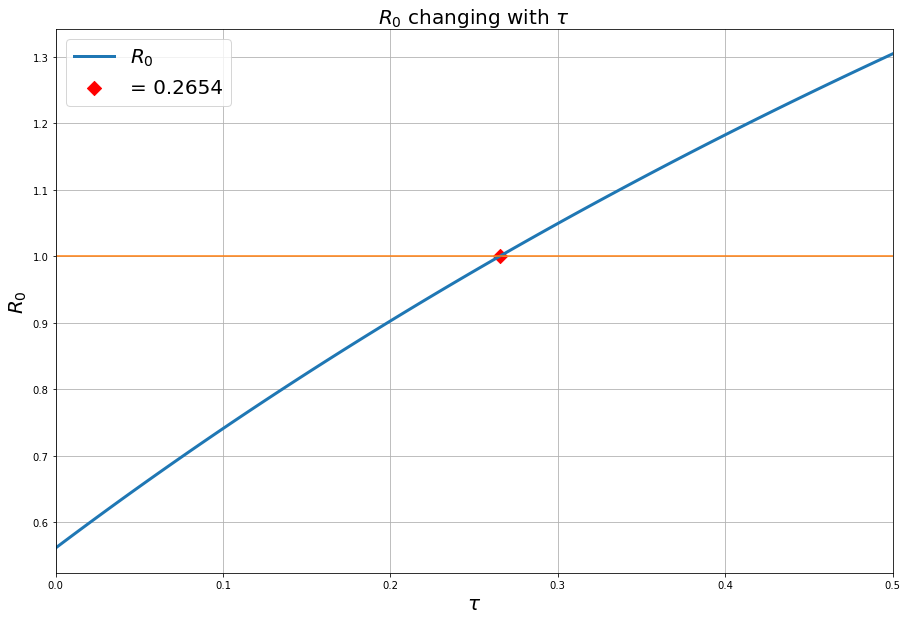

In [75]:
K = 5
lam = 0.04 
A = 0.9
taurange=np.linspace(0,0.5,100)
R0vals=np.zeros((100,2))
i=0
for tau in taurange:
    fp=disfreefixed_point2(K,lam,tau,A)
    R0=lam*fp[0]*D2/(mu*D2+q2*fp[2])
    R0vals[i,0]=R0
    R0vals[i,1]=1
    i+=1
plt.figure(figsize=(15,10))
plt.plot(taurange,R0vals[:,0],label='$R_0$',lw=3)
plt.plot(taurange,R0vals[:,1])
plt.scatter(0.2654,1, c='red', marker='D',label='= 0.2654', s=100)
plt.legend(prop = { "size": 20 })
plt.ylabel('$R_0$',size=20)
plt.xlabel('$\\tau$',size=20)
plt.title('$R_0$ changing with $\\tau$',size=20)
plt.xlim((0,0.5))
plt.grid()
#plt.savefig('Ro changing with tau')

Text(0.5, 0.98, 'State Variables when $\\tau$=0.7')

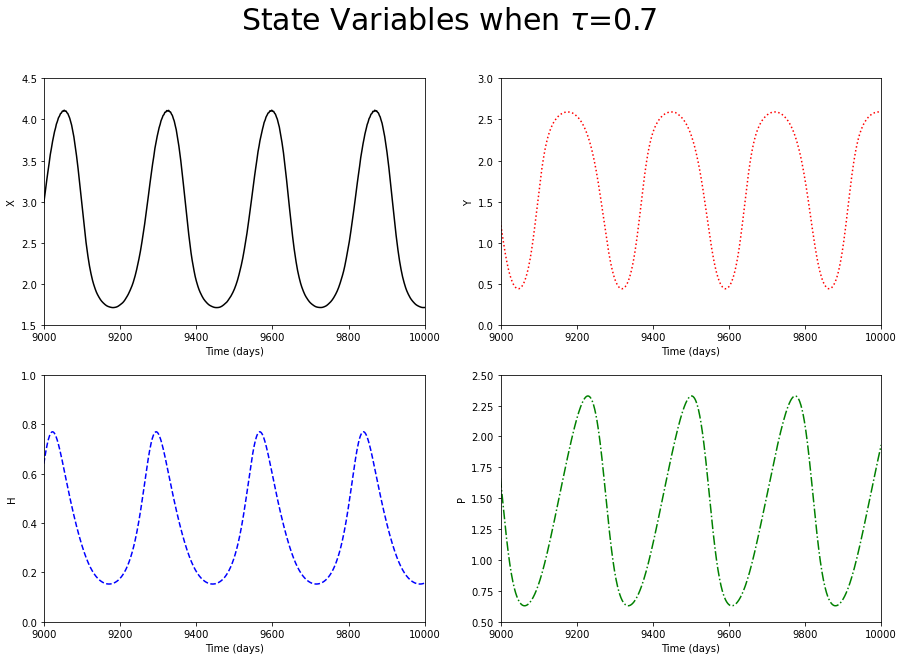

In [76]:
K=5
A=0.9
lam=0.04
tau=0.7

def ODEs(t,u,K,A,lam,tau):
    return [r*u[0]*(1-(u[0]+u[1])/K)-lam*u[0]*u[1]-((q1*u[0]*u[2])/(u[0]+D1)),
            lam*u[0]*u[1]-mu*u[1]-(q2*u[1]*u[2])/(u[1]+D2),
           phi1*u[2]*((q1*(u[3]-tau)*u[0])/(u[0]+D1)+(q2*(p-tau)*u[1])/(u[1]+D2)-c),
           phi2*u[3]*(A/(1+B*u[3])-(q1*u[0]*u[2])/(u[0]+D1))]

t_span=np.array([0,10000])
times=np.linspace(t_span[0],t_span[1],10001)
initcon=fsolve(endemicfixed_point, [2,2,1,1],args=(K,A,lam,tau))
soln=solve_ivp(ODEs,t_span,initcon,args=(K,A,lam,tau),t_eval=times)

t=soln.t
#print(t)
X=soln.y[0]
Y=soln.y[1]
H=soln.y[2]
P=soln.y[3]
linestyle=np.array(['solid','dotted','dashed','dashdot'])
i=0
fig,axs=plt.subplots(2,2,figsize=(15,10))
axs[0,0].plot(t,X,color='black',label='X',linestyle=linestyle[i])
axs[0,0].set_ylabel('X')
axs[0,0].set_xlabel('Time (days)')
axs[0,0].set_xlim((9000,10000))
axs[0,0].set_ylim((1.5,4.5))
i+=1
axs[0,1].plot(t,Y,color='red',label='Y',linestyle=linestyle[i])
axs[0,1].set_ylabel('Y')
axs[0,1].set_xlabel('Time (days)')
axs[0,1].set_xlim((9000,10000))
axs[0,1].set_ylim((0,3))
i+=1
axs[1,0].plot(t,H,color='blue',label='H',linestyle=linestyle[i])
axs[1,0].set_xlabel('Time (days)')
axs[1,0].set_ylabel('H')
axs[1,0].set_xlim((9000,10000))
axs[1,0].set_ylim((0,1))
i+=1
axs[1,1].plot(t,P,color='green',label='P',linestyle=linestyle[i])
axs[1,1].set_ylabel('P')
axs[1,1].set_xlabel('Time (days)')
axs[1,1].set_xlim((9000,10000))
axs[1,1].set_ylim((0.5,2.5))
fig.suptitle('State Variables when $\\tau$=0.7',size=30)
#plt.savefig('Tau in the unstable endemic fp region')

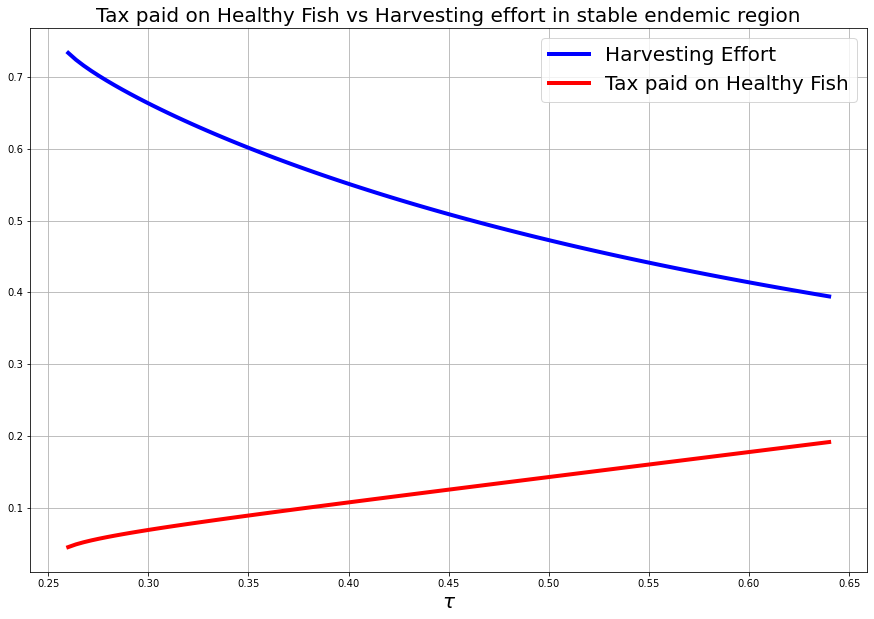

In [77]:
taurange=np.linspace(0.26,0.64,100)
plt.figure(figsize=(15,10))
vals=np.zeros((100,3))
i=0
for tau in taurange:
    fp=fsolve(endemicfixed_point,[2,2,1,1],args=(K,lam,tau,A))
    taxpaidhealthyfish=q1*(fp[3]-tau)*fp[0]/(fp[0]+D1)
    vals[i,0]=fp[2]
    vals[i,1]=taxpaidhealthyfish
    #vals[i,2]=fp[3]
    i+=1
plt.plot(taurange,vals[:,0],color='blue',label='Harvesting Effort',lw=4)
plt.plot(taurange,vals[:,1],color='red',label='Tax paid on Healthy Fish',lw=4)
#plt.plot(lamrange,vals[:,2],color='red',label='H',lw=4)
plt.legend(prop = { "size": 20 })
#plt.ylabel('Fish Biomass',size=20)
plt.xlabel('$\\tau$',size=20)
plt.title('Tax paid on Healthy Fish vs Harvesting effort in stable endemic region',size=20)
plt.grid()
#plt.savefig('Tax paid on healthy fish vs harvesting effort')

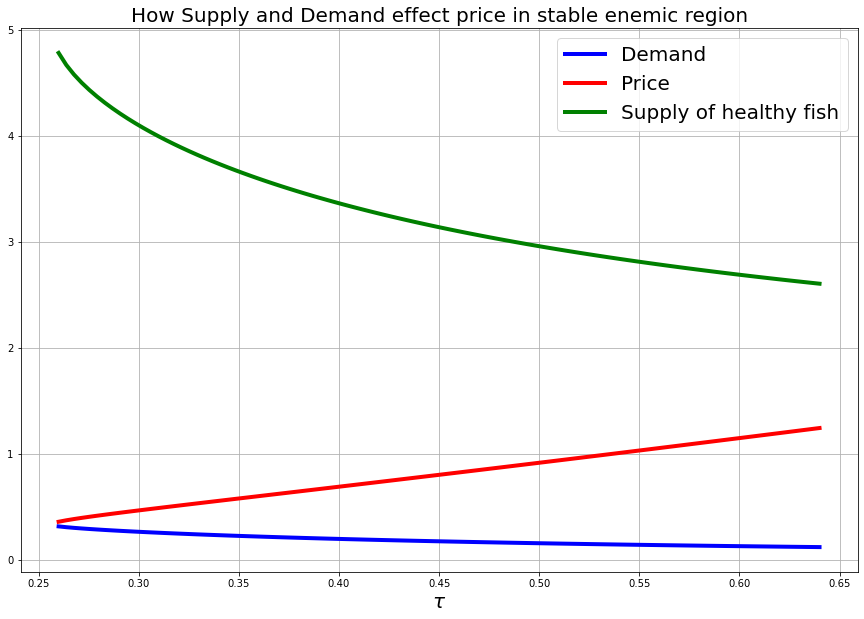

In [78]:
taurange=np.linspace(0.26,0.64,100)
plt.figure(figsize=(15,10))
vals=np.zeros((100,3))
i=0
for tau in taurange:
    fp=fsolve(endemicfixed_point,[2,2,1,1],args=(K,lam,tau,A))
    Demand=A/(1+B*fp[3])
    vals[i,1]=fp[3]
    vals[i,2]=fp[0]
    vals[i,0]=Demand
    i+=1
plt.plot(taurange,vals[:,0],color='blue',label='Demand',lw=4)
plt.plot(taurange,vals[:,1],color='red',label='Price',lw=4)
plt.plot(taurange,vals[:,2],color='green',label='Supply of healthy fish',lw=4)
plt.legend(prop = { "size": 20 })
plt.xlabel('$\\tau$',size=20)
plt.title('How Supply and Demand effect price in stable enemic region',size=20)
plt.grid()
#plt.savefig('Supply-Demand varied with tax')

# Analysis for $\lambda$

C:\Users\seanw\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\seanw\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\seanw\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Text(0.5, 1.0, 'Bifurcation Diagram of $\\lambda$')

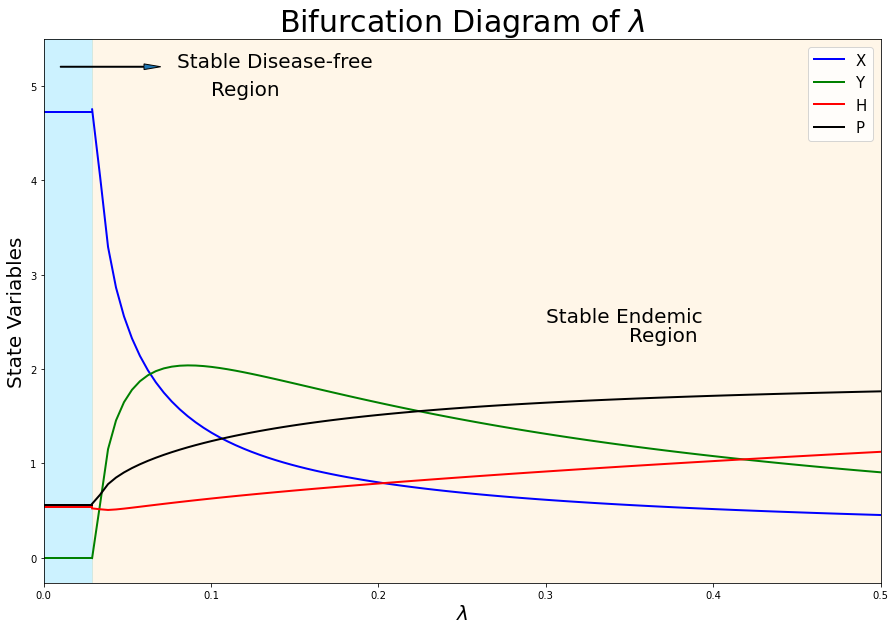

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns
from scipy.optimize import fsolve
import scipy as sp

# Constants

r=0.9
D1=4
D2=4.8
q1=0.8
mu=0.05
q2=0.9
c=0.05
B=5
phi1=0.1
phi2=0.15
p=0.05

# Vary K, $\lambda$ ,$\tau$ and A

𝐾 = 5
lam = 0.04 
tau= 0.5
A=0.9
var=[K,lam,tau,A]

# The 4th fixed point (The endemic Fixed point)

def endemicfixed_point(u,K,lam,tau,A):
    X = u[0]
    Y = u[1]
    H = u[2]
    P = u[3]
    
    eq_X = r*(1-(X+Y)/K)-lam*Y-q1*H/(X+D1)
    eq_Y = lam*X - mu - q2*H/(Y+D2)
    eq_H = q1*(P-tau)*X/(X+D1) + q2*(p-tau)*Y/(Y+D2) - c
    eq_P = A/(1+B*P) - q1*X*H/(X+D1)
    return [eq_X, eq_Y, eq_H, eq_P]

## Changing Aine's slightly

def J(X,Y,H,P,K,lam,tau,A):
    y=np.zeros((4,4))
    y[0,0]= -r*X/K + q1*X*H/(X+D1)**2
    y[0,1]= -r*X/K - X*lam
    y[0,2]= -q1*X/(X+D1)
    y[0,3]= 0
    y[1,0]= lam*Y
    y[1,1]= q2*Y*H/(Y+D2)**2
    y[1,2]= - q2*Y/(Y+D2)
    y[1,3]= 0
    y[2,0]= phi1*H*((q1*(P-tau))/(D1+X)-(q1*X*(P-tau))/(D1+X)**2)
    y[2,1]= phi1*H*((q2*(p-tau))/(D2+Y)-(q2*Y*(p-tau))/(D2+Y)**2)
    y[2,2]= 0
    y[2,3]= phi1*q1*H*X/(X+D1)
    y[3,0]= P*phi2*((H*q1*X)/(X+D1)**2-H*q1/(D1+X))
    y[3,1]= 0
    y[3,2]= -phi2*q1*P*X/(X+D1)
    y[3,3]= -phi2*A*B*P/(1+B*P)**2
    return y

A=0.9
K=5
tau=0.45

lamrange=np.linspace(0,0.1,40)
for lam in lamrange:
    fp=fsolve(endemicfixed_point,[2,2,1,1],args=(K,lam,tau,A))
    eigs=np.linalg.eig(J(fp[0],fp[1],fp[2],fp[3],K,lam,tau,A))[0]
    #print(lam)
    #print(eigs)

# The third disease free fixed point

def J(X,Y,H,P,K,lam,tau,A):
    y=np.zeros((4,4))
    y[0,0]= -r*X/K + q1*X*H/(X+D1)**2
    y[0,1]= -r*X/K - X*lam
    y[0,2]= -q1*X/(X+D1)
    y[0,3]= 0
    y[1,0]= 0
    y[1,1]= (-H*q2)/D2+lam*X-mu
    y[1,2]= 0
    y[1,3]= 0
    y[2,0]= phi1*H*((q1*(P-tau))/(D1+X)-(q1*X*(P-tau))/(D1+X)**2)
    y[2,1]= phi1*H*((q2*(p-tau))/(D2+Y)-(q2*Y*(p-tau))/(D2+Y)**2)
    y[2,2]= 0
    y[2,3]= phi1*q1*H*X/(X+D1)
    y[3,0]= P*phi2*((H*q1*X)/(X+D1)**2-H*q1/(D1+X))
    y[3,1]= 0
    y[3,2]= -phi2*q1*P*X/(X+D1)
    y[3,3]= -phi2*A*B*P/(1+B*P)**2
    return y

def disfreefixed_point1(K,lam,tau,A):
    X=(K*q1*r + B*r*(c*(-D1+K)+K*q1*tau)-np.sqrt(r*(r*(B*c*(D1 + K) + K*q1 + B*K*q1*tau)**2 - 
   4*A*K*q1*(q1 + B*(c + q1*tau)))))/(2*r*(q1 + B*(c + q1*tau)))
    Y=0
    H=r/q1*(1-X/K)*(X+D1)
    P=((A/(r*X*(1-X/K))-1)*1/B)
    return [X,Y,H,P]
disfreefixed_point1(K,lam,tau,A)

def disfreefixed_point2(K,lam,tau,A):
    X=(K*q1*r + B*r*(c*(-D1+K)+K*q1*tau)+np.sqrt(r*(r*(B*c*(D1 + K) + K*q1 + B*K*q1*tau)**2 - 
   4*A*K*q1*(q1 + B*(c + q1*tau)))))/(2*r*(q1 + B*(c + q1*tau)))
    Y=0
    H=r/q1*(1-X/K)*(X+D1)
    P=((A/(r*X*(1-X/K))-1)*1/B)
    return [X,Y,H,P]

A=0.9
K=5
tau=0.45
linew=2

lamrange1=np.linspace(0,0.029,100)
disfreevals=np.zeros((100,4))
i=0
for lam in lamrange1:
    fp=disfreefixed_point2(K,lam,tau,A)
    disfreevals[i,0]=fp[0]
    disfreevals[i,1]=fp[1]
    disfreevals[i,2]=fp[2]
    disfreevals[i,3]=fp[3]
    i+=1
plt.figure(figsize=(15,10))
plt.plot(lamrange1,disfreevals[:,0],lw=linew,color='b')
plt.plot(lamrange1,disfreevals[:,1],lw=linew,color='g')
plt.plot(lamrange1,disfreevals[:,2],lw=linew,color='r')
plt.plot(lamrange1,disfreevals[:,3],lw=linew,color='black')
A=0.9
K=5
tau=0.45

lamrange=np.linspace(0.029,0.5,100)
endvals=np.zeros((100,4))
i=0
for lam in lamrange:
    fp=fsolve(endemicfixed_point,[2,2,1,1],args=(K,lam,tau,A))
    endvals[i,0]=fp[0]
    endvals[i,1]=fp[1]
    endvals[i,2]=fp[2]
    endvals[i,3]=fp[3]
    i+=1
plt.plot(lamrange,endvals[:,0],lw=linew,color='b',label='X')
plt.plot(lamrange,endvals[:,1],lw=linew,color='g',label='Y')
plt.plot(lamrange,endvals[:,2],lw=linew,color='r',label='H')
plt.plot(lamrange,endvals[:,3],lw=linew,color='black',label='P')
plt.axvspan(lamrange1[0], lamrange1[99], color='deepskyblue', alpha=0.2)
plt.axvspan(lamrange[0], lamrange[99], color='moccasin', alpha=0.3)
plt.legend(prop = { "size": 15 })
plt.text(0.3,2.5,'Stable Endemic',size=20)
plt.text(0.35,2.3,'Region',size=20)
plt.text(0.08,5.2,'Stable Disease-free',size=20)
plt.text(0.1,4.9,'Region',size=20)
plt.arrow(0.01, 5.2, 0.05, 0, 
          head_width = 0.06,
          head_length=0.01,
          width = 0.01)
plt.xlim((0,0.5))
plt.xlabel('$\lambda$',size=20)
plt.ylabel('State Variables',size=20)
plt.title('Bifurcation Diagram of $\lambda$',size=30)
#plt.savefig('Lambda Bifurcation 2')

C:\Users\seanw\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


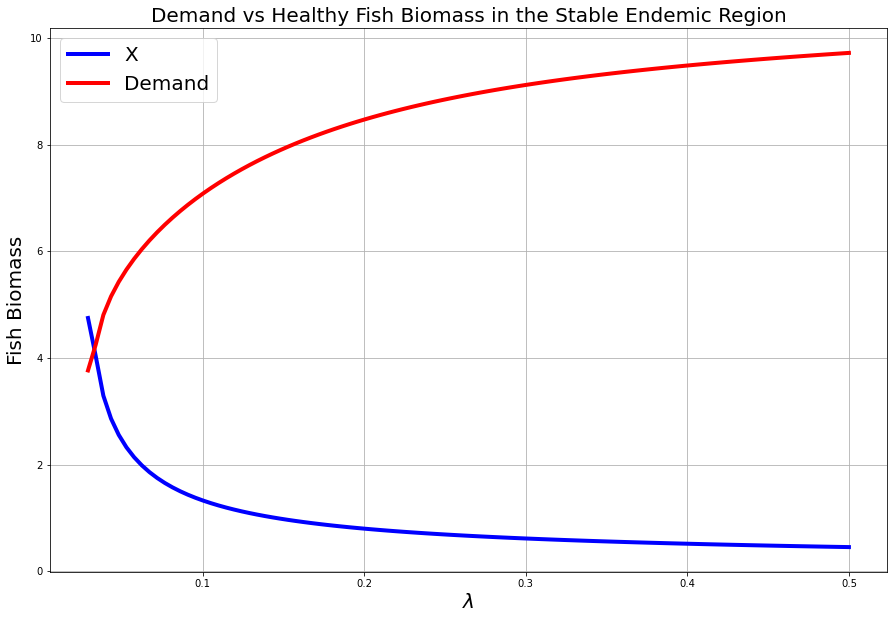

In [80]:
lamrange=np.linspace(0,0.1,40)
for lam in lamrange:
    fp=disfreefixed_point2(K,lam,tau,A)
    eigs=np.linalg.eig(J(fp[0],fp[1],fp[2],fp[3],K,lam,tau,A))[0]
    #print(lam)
    #print(eigs)

lamrange=np.linspace(0.029,0.5,100)
plt.figure(figsize=(15,10))
vals=np.zeros((100,3))
i=0
for lam in lamrange:
    fp=fsolve(endemicfixed_point,[2,2,1,1],args=(K,lam,tau,A))
    demand=A/1+B*fp[3]
    vals[i,0]=fp[0]
    vals[i,1]=demand
    #vals[i,2]=fp[3]
    i+=1
plt.plot(lamrange,vals[:,0],color='blue',label='X',lw=4)
plt.plot(lamrange,vals[:,1],color='red',label='Demand',lw=4)
#plt.plot(lamrange,vals[:,2],color='red',label='H',lw=4)
plt.legend(prop = { "size": 20 })
plt.ylabel('Fish Biomass',size=20)
plt.xlabel('$\lambda$',size=20)
plt.title('Demand vs Healthy Fish Biomass in the Stable Endemic Region',size=20)
plt.grid()
#plt.savefig('Demand vs Healthy Fish Biomass')

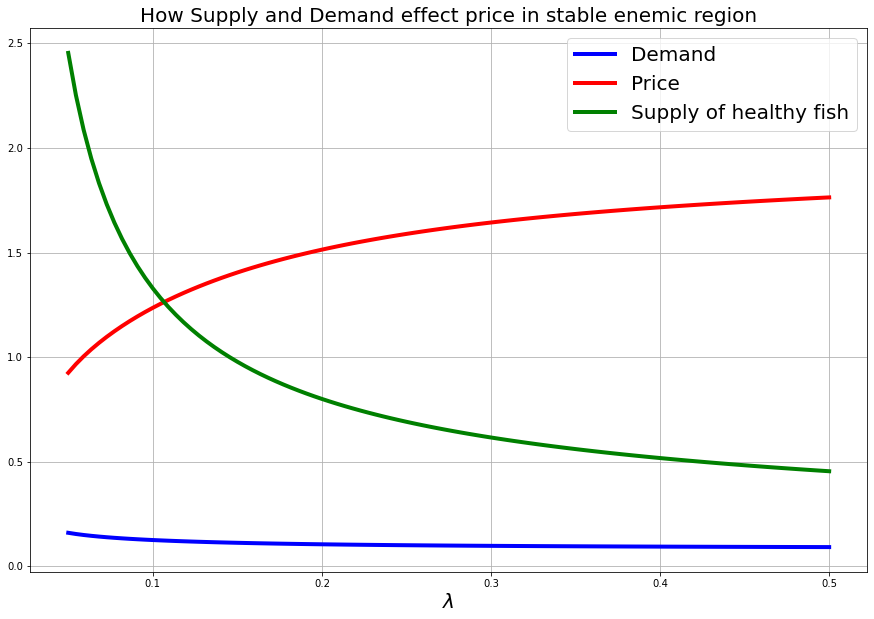

In [81]:
lamrange=np.linspace(0.05,0.5,100)
plt.figure(figsize=(15,10))
vals=np.zeros((100,3))
i=0
for lam in lamrange:
    fp=fsolve(endemicfixed_point,[2,2,1,1],args=(K,lam,tau,A))
    Demand=A/(1+B*fp[3])
    vals[i,1]=fp[3]
    vals[i,2]=fp[0]
    vals[i,0]=Demand
    i+=1
plt.plot(lamrange,vals[:,0],color='blue',label='Demand',lw=4)
plt.plot(lamrange,vals[:,1],color='red',label='Price',lw=4)
plt.plot(lamrange,vals[:,2],color='green',label='Supply of healthy fish',lw=4)
plt.legend(prop = { "size": 20 })
plt.xlabel('$\lambda$',size=20)
plt.title('How Supply and Demand effect price in stable enemic region',size=20)
plt.grid()
#plt.savefig('Demand vs Healthy Fish Biomass')

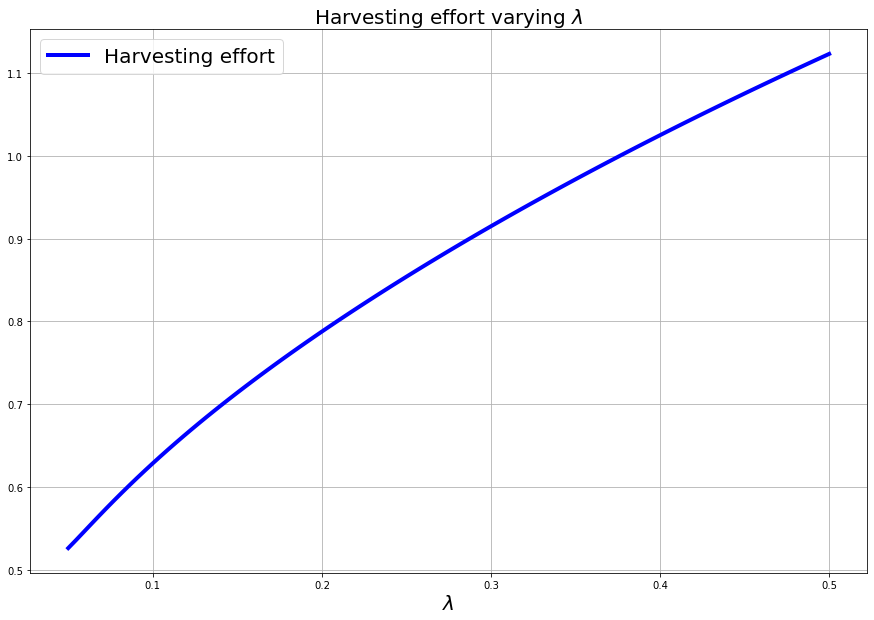

In [82]:
lamrange=np.linspace(0.05,0.5,100)
plt.figure(figsize=(15,10))
vals=np.zeros((100,3))
i=0
for lam in lamrange:
    fp=fsolve(endemicfixed_point,[2,2,1,1],args=(K,lam,tau,A))
    Demand=A/(1+B*fp[3])
    vals[i,1]=fp[2]
    vals[i,2]=fp[0]
    vals[i,0]=Demand
    i+=1
#plt.plot(lamrange,vals[:,0],color='blue',label='Demand',lw=4)
plt.plot(lamrange,vals[:,1],color='blue',label='Harvesting effort',lw=4)
#plt.plot(lamrange,vals[:,2],color='green',label='Supply of healthy fish',lw=4)
plt.legend(prop = { "size": 20 })
plt.xlabel('$\lambda$',size=20)
plt.title('Harvesting effort varying $\lambda$',size=20)
plt.grid()
#plt.savefig('Harvesting effort varying lambda')

C:\Users\seanw\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


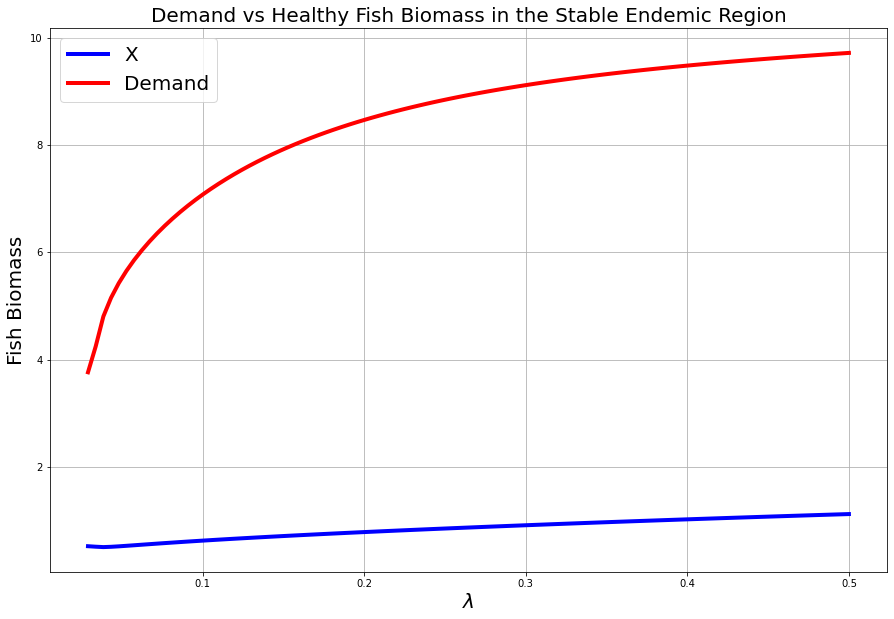

In [83]:
lamrange=np.linspace(0.029,0.5,100)
plt.figure(figsize=(15,10))
vals=np.zeros((100,3))
i=0
for lam in lamrange:
    fp=fsolve(endemicfixed_point,[2,2,1,1],args=(K,lam,tau,A))
    demand=A/1+B*fp[3]
    vals[i,0]=fp[2]
    vals[i,1]=demand
    #vals[i,2]=fp[3]
    i+=1
plt.plot(lamrange,vals[:,0],color='blue',label='X',lw=4)
plt.plot(lamrange,vals[:,1],color='red',label='Demand',lw=4)
#plt.plot(lamrange,vals[:,2],color='red',label='H',lw=4)
plt.legend(prop = { "size": 20 })
plt.ylabel('Fish Biomass',size=20)
plt.xlabel('$\lambda$',size=20)
plt.title('Demand vs Healthy Fish Biomass in the Stable Endemic Region',size=20)
plt.grid()
#plt.savefig('Demand vs Healthy Fish Biomass')

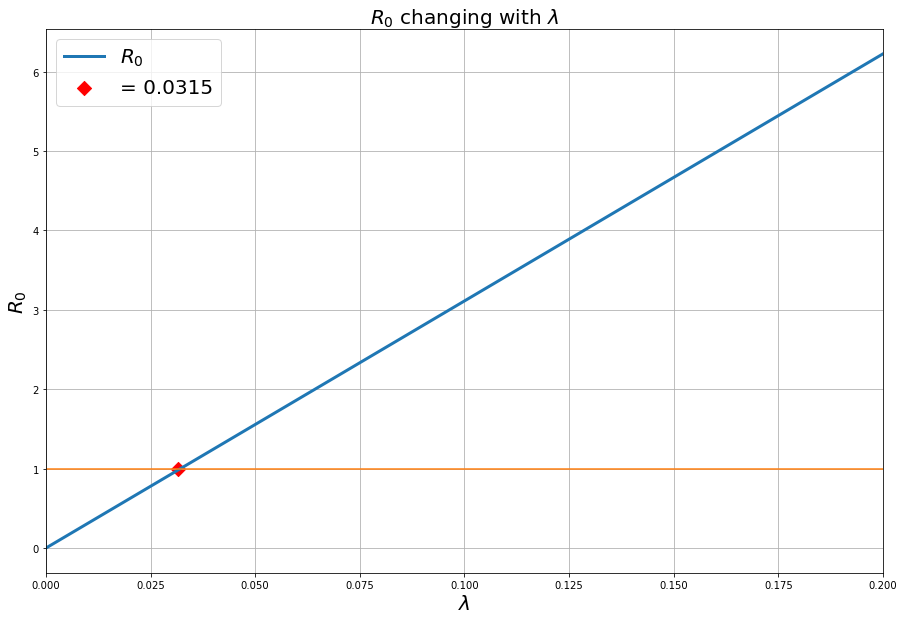

In [84]:
A=0.9
K=5
tau=0.45
lamrange=np.linspace(0,0.2,100)
R0vals=np.zeros((100,2))
i=0
for lam in lamrange:
    fp=disfreefixed_point2(K,lam,tau,A)
    R0=lam*fp[0]*D2/(mu*D2+q2*fp[2])
    R0vals[i,0]=R0
    R0vals[i,1]=1
    i+=1
plt.figure(figsize=(15,10))
plt.plot(lamrange,R0vals[:,0],label='$R_0$',lw=3)
plt.plot(lamrange,R0vals[:,1])
plt.scatter(0.0315,1, c='red', marker='D',label='= 0.0315', s=100)
plt.legend(prop = { "size": 20 })
plt.ylabel('$R_0$',size=20)
plt.xlabel('$\lambda$',size=20)
plt.title('$R_0$ changing with $\lambda$',size=20)
plt.xlim((0,0.2))
plt.grid()
#plt.savefig('Ro changing with lambda')

# Analysis for K

C:\Users\seanw\AppData\Local\Temp\ipykernel_6852\1238377326.py:77: RuntimeWarning: invalid value encountered in double_scalars
  H=r/q1*(1-X/K)*(X+D1)
C:\Users\seanw\AppData\Local\Temp\ipykernel_6852\1238377326.py:78: RuntimeWarning: invalid value encountered in double_scalars
  P=((A/(r*X*(1-X/K))-1)*1/B)


Text(0.5, 1.0, 'Bifurcation Diagram of $K$')

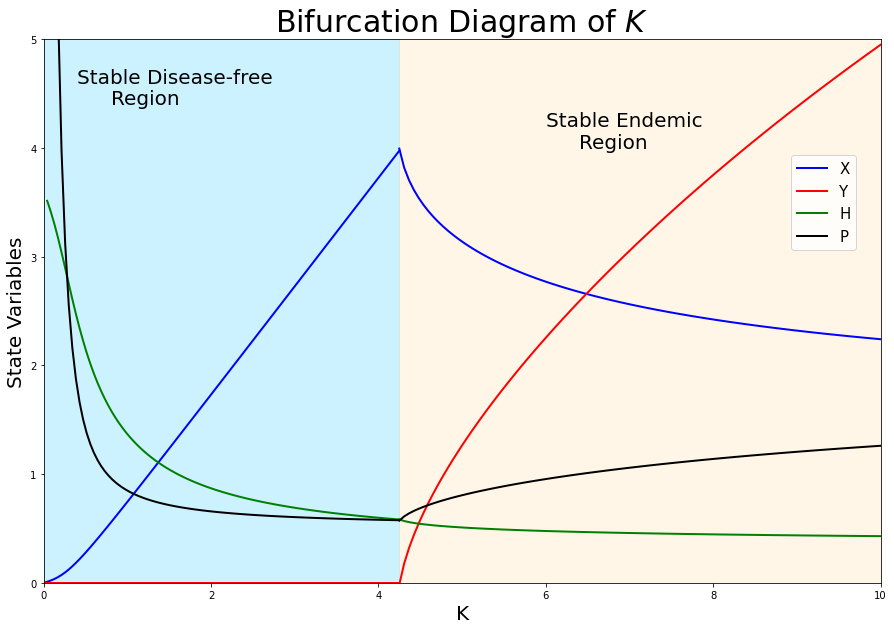

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns
from scipy.optimize import fsolve
import scipy as sp

# Constants

r=0.9
D1=4
D2=4.8
q1=0.8
mu=0.05
q2=0.9
c=0.05
B=5
phi1=0.1
phi2=0.15
p=0.05

# Vary K, $\lambda$ ,$\tau$ and A

𝐾 = 5
lam = 0.04 
tau= 0.5
A=0.9
var=[K,lam,tau,A]

# The 4th fixed point (The endemic Fixed point)

def endemicfixed_point(u,K,lam,tau,A):
    X = u[0]
    Y = u[1]
    H = u[2]
    P = u[3]
    
    eq_X = r*(1-(X+Y)/K)-lam*Y-q1*H/(X+D1)
    eq_Y = lam*X - mu - q2*H/(Y+D2)
    eq_H = q1*(P-tau)*X/(X+D1) + q2*(p-tau)*Y/(Y+D2) - c
    eq_P = A/(1+B*P) - q1*X*H/(X+D1)
    return [eq_X, eq_Y, eq_H, eq_P]

## Changing Aine's slightly

def J(X,Y,H,P,K,lam,tau,A):
    y=np.zeros((4,4))
    y[0,0]= -r*X/K + q1*X*H/(X+D1)**2
    y[0,1]= -r*X/K - X*lam
    y[0,2]= -q1*X/(X+D1)
    y[0,3]= 0
    y[1,0]= lam*Y
    y[1,1]= q2*Y*H/(Y+D2)**2
    y[1,2]= - q2*Y/(Y+D2)
    y[1,3]= 0
    y[2,0]= phi1*H*((q1*(P-tau))/(D1+X)-(q1*X*(P-tau))/(D1+X)**2)
    y[2,1]= phi1*H*((q2*(p-tau))/(D2+Y)-(q2*Y*(p-tau))/(D2+Y)**2)
    y[2,2]= 0
    y[2,3]= phi1*q1*H*X/(X+D1)
    y[3,0]= P*phi2*((H*q1*X)/(X+D1)**2-H*q1/(D1+X))
    y[3,1]= 0
    y[3,2]= -phi2*q1*P*X/(X+D1)
    y[3,3]= -phi2*A*B*P/(1+B*P)**2
    return y

def disfreefixed_point1(K,lam,tau,A):
    X=(K*q1*r + B*r*(c*(-D1+K)+K*q1*tau)-np.sqrt(r*(r*(B*c*(D1 + K) + K*q1 + B*K*q1*tau)**2 - 
   4*A*K*q1*(q1 + B*(c + q1*tau)))))/(2*r*(q1 + B*(c + q1*tau)))
    Y=0
    H=r/q1*(1-X/K)*(X+D1)
    P=((A/(r*X*(1-X/K))-1)*1/B)
    return [X,Y,H,P]
def disfreefixed_point2(K,lam,tau,A):
    X=(K*q1*r + B*r*(c*(-D1+K)+K*q1*tau)+np.sqrt(r*(r*(B*c*(D1 + K) + K*q1 + B*K*q1*tau)**2 - 
   4*A*K*q1*(q1 + B*(c + q1*tau)))))/(2*r*(q1 + B*(c + q1*tau)))
    Y=0
    H=r/q1*(1-X/K)*(X+D1)
    P=((A/(r*X*(1-X/K))-1)*1/B)
    return [X,Y,H,P]

A=0.9
lam=0.04
tau=0.45

Krange1=np.linspace(0,4.25,100)
disfreevals=np.zeros((100,4))

plt.figure(figsize=(15,10))
Krange=np.linspace(4.25,10,100)
endvals=np.zeros((100,4))
i=0
for K in Krange:
    fp=fsolve(endemicfixed_point,[2,2,1,1],args=(K,lam,tau,A))
    endvals[i,0]=fp[0]
    endvals[i,1]=fp[1]
    endvals[i,2]=fp[2]
    endvals[i,3]=fp[3]
    i+=1
linew=2
plt.plot(Krange,endvals[:,0],lw=linew,color='b')
plt.plot(Krange,endvals[:,1],lw=linew,color='r')
plt.plot(Krange,endvals[:,2],lw=linew,color='g')
plt.plot(Krange,endvals[:,3],lw=linew,color='black')


i=0
for K in Krange1:
    fp=disfreefixed_point2(K,lam,tau,A)
    disfreevals[i,0]=fp[0]
    disfreevals[i,1]=fp[1]
    disfreevals[i,2]=fp[2]
    disfreevals[i,3]=fp[3]
    i+=1
linew=2
plt.plot(Krange1,disfreevals[:,0],lw=linew,color='b',label='X')
plt.plot(Krange1,disfreevals[:,1],lw=linew,color='r',label='Y')
plt.plot(Krange1,disfreevals[:,2],lw=linew,color='g',label='H')
plt.plot(Krange1,disfreevals[:,3],lw=linew,color='black',label='P')
plt.ylim((0,5))
plt.xlim((0,10))
plt.axvspan(Krange1[0], Krange1[99], color='deepskyblue', alpha=0.2)
plt.axvspan(Krange[0], Krange[99], color='moccasin', alpha=0.3)
plt.legend(bbox_to_anchor=(0.98,0.8),prop = { "size": 15 })
plt.text(6,4.2,'Stable Endemic',size=20)
plt.text(6.4,4,'Region',size=20)
plt.text(0.4,4.6,'Stable Disease-free',size=20)
plt.text(0.8,4.4,'Region',size=20)
plt.xlabel('K',size=20)
plt.ylabel('State Variables',size=20)
plt.title('Bifurcation Diagram of $K$',size=30)
#plt.savefig('K bifurcation')

C:\Users\seanw\AppData\Local\Temp\ipykernel_6852\1238377326.py:77: RuntimeWarning: invalid value encountered in double_scalars
  H=r/q1*(1-X/K)*(X+D1)
C:\Users\seanw\AppData\Local\Temp\ipykernel_6852\1238377326.py:78: RuntimeWarning: invalid value encountered in double_scalars
  P=((A/(r*X*(1-X/K))-1)*1/B)


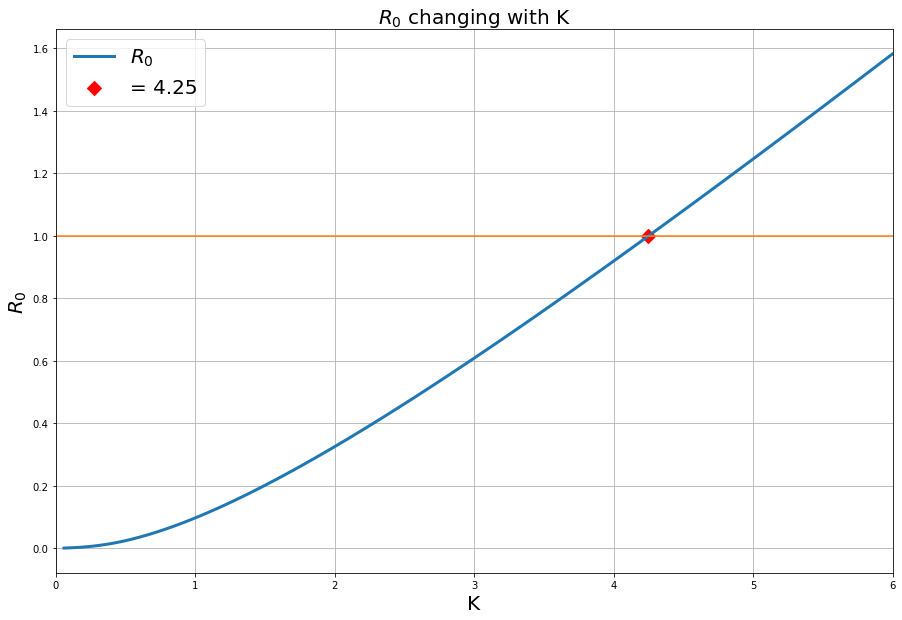

In [86]:
A=0.9
lam=0.04
tau=0.45
Krange=np.linspace(0,6,100)
R0vals=np.zeros((100,2))
i=0
for K in Krange:
    fp=disfreefixed_point2(K,lam,tau,A)
    R0=lam*fp[0]*D2/(mu*D2+q2*fp[2])
    R0vals[i,0]=R0
    R0vals[i,1]=1
    i+=1
plt.figure(figsize=(15,10))
plt.plot(Krange,R0vals[:,0],label='$R_0$',lw=3)
plt.plot(Krange,R0vals[:,1])
plt.scatter(4.25,1, c='red', marker='D',label='= 4.25', s=100)
plt.legend(prop = { "size": 20 })
plt.ylabel('$R_0$',size=20)
plt.xlabel('K',size=20)
plt.title('$R_0$ changing with K',size=20)
plt.xlim((0,6))
plt.grid()
#plt.savefig('Ro changing with K')

# Analysis of A

Text(0.5, 0.98, 'State variables varying A')

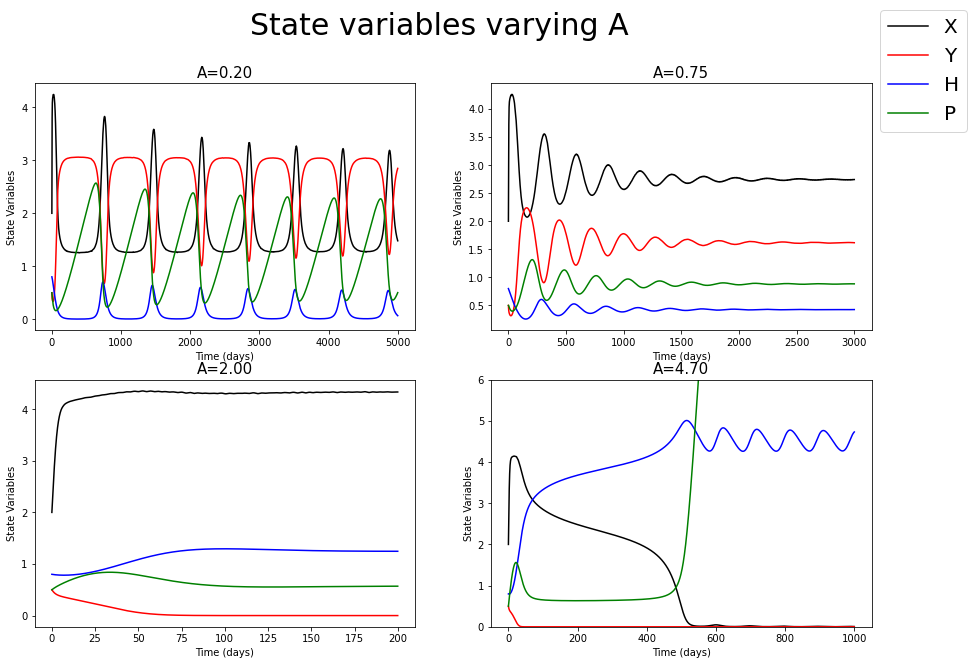

In [87]:
K=5
lam=0.04
tau=0.45
def ODEs(t,u,A):
    return [r*u[0]*(1-(u[0]+u[1])/K)-lam*u[0]*u[1]-((q1*u[0]*u[2])/(u[0]+D1)),
            lam*u[0]*u[1]-mu*u[1]-(q2*u[1]*u[2])/(u[1]+D2),
           phi1*u[2]*((q1*(u[3]-tau)*u[0])/(u[0]+D1)+(q2*(p-tau)*u[1])/(u[1]+D2)-c),
           phi2*u[3]*(A/(1+B*u[3])-(q1*u[0]*u[2])/(u[0]+D1))]


fig,axs=plt.subplots(2,2,figsize=(15,10))
axs[1,1].set_ylim((0,6))

initcon=np.array([2,.5,0.8,0.5])
def plotgraphs(initcon,A,vpos,hpos,tfinal,true):
    t_span=np.array([0,tfinal])
    times=np.linspace(t_span[0],t_span[1],5001)
    soln=solve_ivp(ODEs,t_span,initcon,args=(A,),t_eval=times)
    t=soln.t
    X=soln.y[0]
    Y=soln.y[1]
    H=soln.y[2]
    P=soln.y[3]
    if (true==1):
        axs[vpos,hpos].plot(t,X,color='black',label='X')#,linestyle=linestyle[i])
        axs[vpos,hpos].plot(t,Y,color='red',label='Y')#,linestyle=linestyle[i])
        axs[vpos,hpos].plot(t,H,color='blue',label='H')#,linestyle=linestyle[i])
        axs[vpos,hpos].plot(t,P,color='green',label='P')#,linestyle=linestyle[i])
        axs[vpos,hpos].set_title('A=%0.2f'%(A),size=15)
        axs[vpos,hpos].set_ylabel('State Variables')
        axs[vpos,hpos].set_xlabel('Time (days)')
    else:
        axs[vpos,hpos].plot(t,X,color='black')#,linestyle=linestyle[i])
        axs[vpos,hpos].plot(t,Y,color='red')#,linestyle=linestyle[i])
        axs[vpos,hpos].plot(t,H,color='blue')#,linestyle=linestyle[i])
        axs[vpos,hpos].plot(t,P,color='green')#,linestyle=linestyle[i])
        axs[vpos,hpos].set_title('A=%0.2f'%(A),size=15)
        axs[vpos,hpos].set_ylabel('State Variables')
        axs[vpos,hpos].set_xlabel('Time (days)')
    #plt.legend()
    #plt.ylabel('State Variables')
    #plt.xlabel('Time (days)')
    #plt.title('$\lambda = 0.02$')
    #i+=1   
plotgraphs(initcon,0.2,0,0,5000,1)
plotgraphs(initcon,0.75,0,1,3000,0)
plotgraphs(initcon,2,1,0,200,0)
plotgraphs(initcon,4.7,1,1,1000,0)
fig.legend(prop = { "size": 20 })
fig.suptitle('State variables varying A',size=30)
#plt.savefig('Different cases of A')

Text(0.5, 0.98, 'Bifurcation diagrams of $A$')

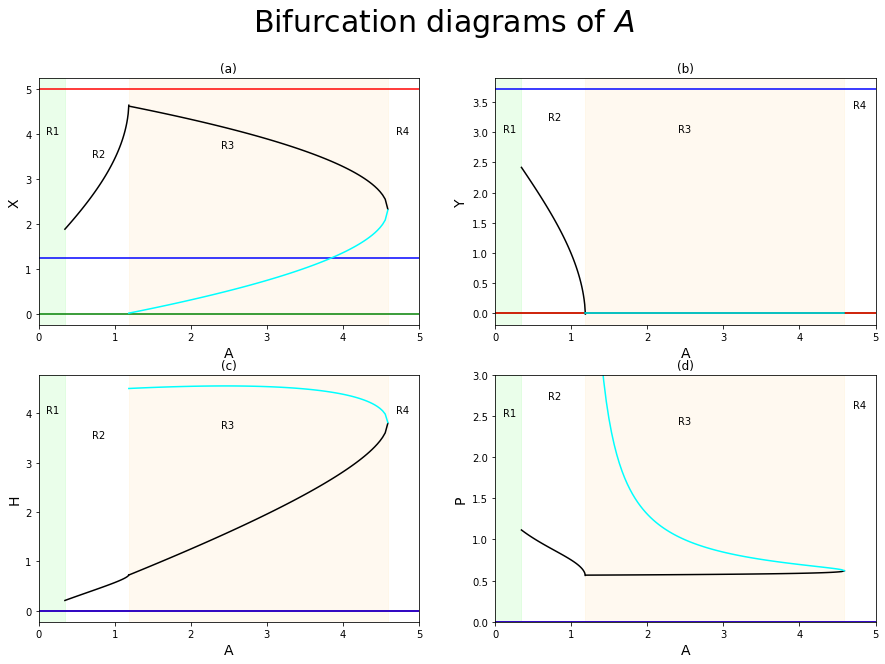

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns
from scipy.optimize import fsolve
import scipy as sp

# Constants

r=0.9
D1=4
D2=4.8
q1=0.8
mu=0.05
q2=0.9
c=0.05
B=5
phi1=0.1
phi2=0.15
p=0.05

# Vary K, $\lambda$ ,$\tau$ and A

𝐾 = 5
lam = 0.04 
tau= 0.5
A=0.9
var=[K,lam,tau,A]

# The 4th fixed point (The endemic Fixed point)

def endemicfixed_point(u,K,lam,tau,A):
    X = u[0]
    Y = u[1]
    H = u[2]
    P = u[3]
    
    eq_X = r*(1-(X+Y)/K)-lam*Y-q1*H/(X+D1)
    eq_Y = lam*X - mu - q2*H/(Y+D2)
    eq_H = q1*(P-tau)*X/(X+D1) + q2*(p-tau)*Y/(Y+D2) - c
    eq_P = A/(1+B*P) - q1*X*H/(X+D1)
    return [eq_X, eq_Y, eq_H, eq_P]

## Changing Aine's slightly

def J(X,Y,H,P,K,lam,tau,A):
    y=np.zeros((4,4))
    y[0,0]= -r*X/K + q1*X*H/(X+D1)**2
    y[0,1]= -r*X/K - X*lam
    y[0,2]= -q1*X/(X+D1)
    y[0,3]= 0
    y[1,0]= lam*Y
    y[1,1]= q2*Y*H/(Y+D2)**2
    y[1,2]= - q2*Y/(Y+D2)
    y[1,3]= 0
    y[2,0]= phi1*H*((q1*(P-tau))/(D1+X)-(q1*X*(P-tau))/(D1+X)**2)
    y[2,1]= phi1*H*((q2*(p-tau))/(D2+Y)-(q2*Y*(p-tau))/(D2+Y)**2)
    y[2,2]= 0
    y[2,3]= phi1*q1*H*X/(X+D1)
    y[3,0]= P*phi2*((H*q1*X)/(X+D1)**2-H*q1/(D1+X))
    y[3,1]= 0
    y[3,2]= -phi2*q1*P*X/(X+D1)
    y[3,3]= -phi2*A*B*P/(1+B*P)**2
    return y

# The disease free fixed point

# The trivial fixed point
e0=np.array([0,0,0,0])
# The Only Healthy Fish fixed point
e1=np.array([K,0,0,0])
# The Healthy and Infected fixed point
e2=np.array([mu/lam,r*(lam*K-mu)/lam*(r+K*lam),0,0])
def X31(A):
    return (K*q1*r + B*r*(c*(-D1+K)+K*q1*tau)-np.sqrt(r*(r*(B*c*(D1 + K) + K*q1 + B*K*q1*tau)**2 - 
   4*A*K*q1*(q1 + B*(c + q1*tau)))))/(2*r*(q1 + B*(c + q1*tau)))
def X32(A):
    return (K*q1*r + B*r*(c*(-D1+K)+K*q1*tau)+np.sqrt(r*(r*(B*c*(D1 + K) + K*q1 + B*K*q1*tau)**2 - 
   4*A*K*q1*(q1 + B*(c + q1*tau)))))/(2*r*(q1 + B*(c + q1*tau)))
def H31(A):
    return r/q1*(1-X31(A)/K)*(X31(A)+D1)
def H32(A):
    return r/q1*(1-X32(A)/K)*(X32(A)+D1)
def P31(A):
    return ((A/(r*X31(A)*(1-X31(A)/K))-1)*1/B)
def P32(A):
    return ((A/(r*X32(A)*(1-X32(A)/K))-1)*1/B)
def e31(A):
    return np.array([X31(A),0,H31(A),P31(A)])
def e32(A):
    return np.array([X32(A),0,H32(A),P32(A)])

K = 5
lam = 0.04 
tau=0.45
n=100
Arange2=np.linspace(0,5,100)
e0vals=np.zeros((n,4))
e1vals=np.zeros((n,4))
e2vals=np.zeros((n,4))
i=0
for A in Arange2:
    e0vals[i,0]=e0[0]
    e0vals[i,1]=e0[1]
    e0vals[i,2]=e0[2]
    e0vals[i,3]=e0[3]
    e1vals[i,0]=e1[0]
    e1vals[i,1]=e1[1]
    e1vals[i,2]=e1[2]
    e1vals[i,3]=e1[3]
    e2vals[i,0]=e2[0]
    e2vals[i,1]=e2[1]
    e2vals[i,2]=e2[2]
    e2vals[i,3]=e2[3]
    i+=1
    
fig,axs=plt.subplots(2,2,figsize=(15,10))
Arange=np.linspace(1.186,4.59,100)
disfvals1=np.zeros((n,4))
disfvals2=np.zeros((n,4))
i=0
for A in Arange:
    disfvals1[i,0]=e32(A)[0]
    disfvals1[i,1]=e32(A)[1]
    disfvals1[i,2]=e32(A)[2]
    disfvals1[i,3]=e32(A)[3]
    disfvals2[i,0]=e31(A)[0]
    disfvals2[i,1]=e31(A)[1]
    disfvals2[i,2]=e31(A)[2]
    disfvals2[i,3]=e31(A)[3]
    i+=1
    
Arange3=np.linspace(0,1.186,100)
disfreevals=np.zeros
    
n=100
Arange1=np.linspace(0.346,1.186,n)
endvals=np.zeros((n,4))
i=0
for A in Arange1:
    fp=fsolve(endemicfixed_point,[2,2,1,1],args=(K,lam,tau,A))
    endvals[i,0]=fp[0]
    endvals[i,1]=fp[1]
    endvals[i,2]=fp[2]
    endvals[i,3]=fp[3]
    i+=1
axs[0,0].axvspan(0, 0.346, color='palegreen', alpha=0.2)
axs[0,0].axvspan(Arange[0], Arange[99], color='moccasin', alpha=0.2)
axs[0,1].axvspan(0, 0.346, color='palegreen', alpha=0.2)
axs[0,1].axvspan(Arange[0], Arange[99], color='moccasin', alpha=0.2)
axs[1,0].axvspan(0, 0.346, color='palegreen', alpha=0.2)
axs[1,0].axvspan(Arange[0], Arange[99], color='moccasin', alpha=0.2)
axs[1,1].axvspan(0, 0.346, color='palegreen', alpha=0.2)
axs[1,1].axvspan(Arange[0], Arange[99], color='moccasin', alpha=0.2)
axs[0,0].plot(Arange2,e0vals[:,0],color='green')
axs[0,1].plot(Arange2,e0vals[:,1],color='green')
axs[1,0].plot(Arange2,e0vals[:,2],color='green')
axs[1,1].plot(Arange2,e0vals[:,3],color='green')
axs[0,0].plot(Arange2,e1vals[:,0],color='red')
axs[0,1].plot(Arange2,e1vals[:,1],color='red')
axs[1,0].plot(Arange2,e1vals[:,2],color='red')
axs[1,1].plot(Arange2,e1vals[:,3],color='red')
axs[0,0].plot(Arange2,e2vals[:,0],color='blue')
axs[0,1].plot(Arange2,e2vals[:,1],color='blue')
axs[1,0].plot(Arange2,e2vals[:,2],color='blue')
axs[1,1].plot(Arange2,e2vals[:,3],color='blue')
axs[0,0].plot(Arange1,endvals[:,0],color='black')
axs[0,1].plot(Arange1,endvals[:,1],color='black')
axs[1,0].plot(Arange1,endvals[:,2],color='black')
axs[1,1].plot(Arange1,endvals[:,3],color='black')
axs[0,0].plot(Arange,disfvals1[:,0],color='black')
axs[0,1].plot(Arange,disfvals1[:,1],color='black')
axs[1,0].plot(Arange,disfvals1[:,2],color='black')
axs[1,1].plot(Arange,disfvals1[:,3],color='black')
axs[0,0].plot(Arange,disfvals2[:,0],color='cyan')
axs[0,1].plot(Arange,disfvals2[:,1],color='cyan')
axs[1,0].plot(Arange,disfvals2[:,2],color='cyan')
axs[1,1].plot(Arange,disfvals2[:,3],color='cyan')
axs[1,1].set_ylim((0,3))
axs[0,0].set_title('(a)',size=12)
axs[0,1].set_title('(b)',size=12)
axs[1,0].set_title('(c)',size=12)
axs[1,1].set_title('(d)',size=12)
axs[0,0].set_xlabel('A',size=14)
axs[0,1].set_xlabel('A',size=14)
axs[1,0].set_xlabel('A',size=14)
axs[1,1].set_xlabel('A',size=14)
axs[0,0].set_ylabel('X',size=14)
axs[0,1].set_ylabel('Y',size=14)
axs[1,0].set_ylabel('H',size=14)
axs[1,1].set_ylabel('P',size=14)
axs[0,0].set_xlim((0,5))
axs[0,0].text(0.1,4,'R1')
axs[0,0].text(0.7,3.5,'R2')
axs[0,0].text(2.4,3.7,'R3')
axs[0,0].text(4.7,4,'R4')
axs[0,1].set_xlim((0,5))
axs[0,1].text(0.1,3,'R1')
axs[0,1].text(0.7,3.2,'R2')
axs[0,1].text(2.4,3,'R3')
axs[0,1].text(4.7,3.4,'R4')
axs[1,0].set_xlim((0,5))
axs[1,0].text(0.1,4,'R1')
axs[1,0].text(0.7,3.5,'R2')
axs[1,0].text(2.4,3.7,'R3')
axs[1,0].text(4.7,4,'R4')
axs[1,1].set_xlim((0,5))
axs[1,1].text(0.1,2.5,'R1')
axs[1,1].text(0.7,2.7,'R2')
axs[1,1].text(2.4,2.4,'R3')
axs[1,1].text(4.7,2.6,'R4')
fig.suptitle('Bifurcation diagrams of $A$',size=30)
#plt.savefig('Bifurcation of A')

In [89]:
𝐾 = 5
lam = 0.04 
tau= 0.45
n=100
Arange=np.linspace(0.01,0.45,n)
eigs_real = np.zeros((n))
eigs_imag = np.zeros((n,1))
i=0
for A in Arange:
    fp=fsolve(endemicfixed_point, [2,2,1,1],args=(K,lam,tau,A))
    eigs=np.linalg.eig(J(fp[0],fp[1],fp[2],fp[3],K,lam,tau,A))[0]
    b=eigs[eigs.imag>0].real
    eigs_real[i]=b[1]
    i+=1
# plt.plot(Arange,np.zeros(n),lw=1)
# plt.plot(Arange,eigs_real,lw=2)
# plt.scatter(0.346,0, c='red', marker='D',label='= 0.346', s=50)
# plt.legend()

𝐾 = 5
lam = 0.04 
tau= 0.45
n=100
Arange2=np.linspace(1,1.75,n)
eigs_real2 = np.zeros((n))
eigs_imag2 = np.zeros((n,1))
i=0
for A in Arange2:
    fp=fsolve(endemicfixed_point, [2,2,1,1],args=(K,lam,tau,A))
    eigs=np.linalg.eig(J(fp[0],fp[1],fp[2],fp[3],K,lam,tau,A))[0]
    #print(A)
    #print(eigs)
    c=eigs[eigs.imag==0].real[1]
    eigs_real2[i]=c
    i+=1

C:\Users\seanw\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\seanw\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(1.1, 1.75)

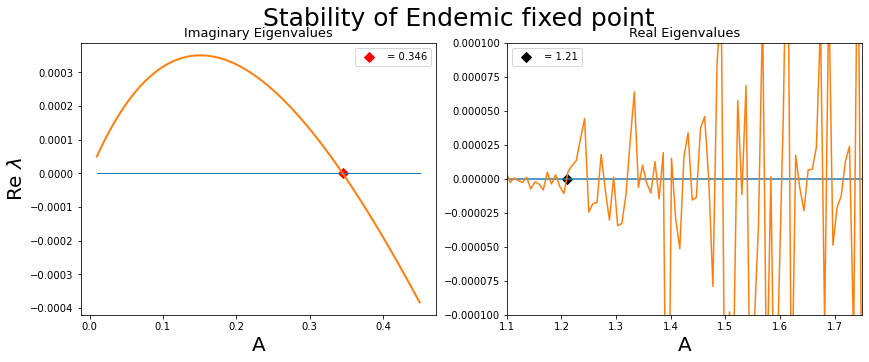

In [90]:
# plt.plot(Arange2,np.zeros(n))
# plt.plot(Arange2,eigs_real2)
# plt.scatter(1.22,0, c='red', marker='D',label='= 1.22', s=50)
# plt.legend()
# plt.ylim((-0.0001,0.0001))

fig,axs=plt.subplots(1,2,figsize=(14,5))
fig.suptitle('Stability of Endemic fixed point',size=25)
axs[1].plot(Arange2,np.zeros(n))
axs[1].plot(Arange2,eigs_real2)
axs[1].scatter(1.21,0, c='black', marker='D',label='= 1.21', s=50)
axs[1].legend()
axs[1].set_ylim((-0.0001,0.0001))
axs[0].set_title('Imaginary Eigenvalues',size=13)
axs[1].set_title('Real Eigenvalues',size=13)
axs[0].set_ylabel('Re $\lambda$',size=20)
axs[0].set_xlabel('A',size=20)
axs[1].set_xlabel('A',size=20)
axs[0].plot(Arange,np.zeros(100),lw=1)
axs[0].plot(Arange,eigs_real,lw=2)
axs[0].scatter(0.346,0, c='red', marker='D',label='= 0.346', s=50)
axs[0].legend()
axs[1].set_xlim((1.1,1.75))
#plt.savefig('Endemic Stability for A')

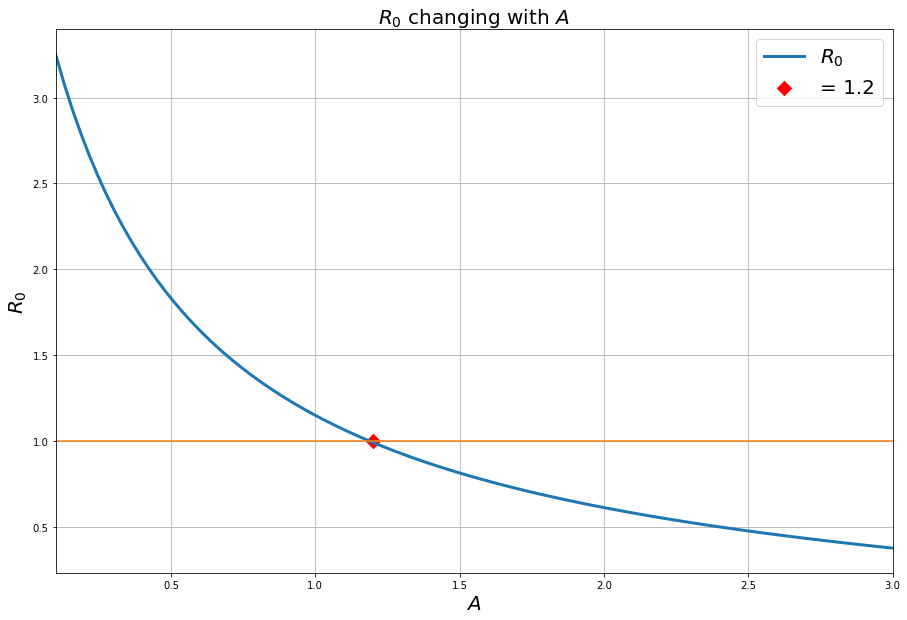

In [97]:
def disfreefixed_point1(K,lam,tau,A):
    X=(K*q1*r + B*r*(c*(-D1+K)+K*q1*tau)-np.sqrt(r*(r*(B*c*(D1 + K) + K*q1 + B*K*q1*tau)**2 - 
   4*A*K*q1*(q1 + B*(c + q1*tau)))))/(2*r*(q1 + B*(c + q1*tau)))
    Y=0
    H=r/q1*(1-X/K)*(X+D1)
    P=((A/(r*X*(1-X/K))-1)*1/B)
    return [X,Y,H,P]
def disfreefixed_point2(K,lam,tau,A):
    X=(K*q1*r + B*r*(c*(-D1+K)+K*q1*tau)+np.sqrt(r*(r*(B*c*(D1 + K) + K*q1 + B*K*q1*tau)**2 - 
   4*A*K*q1*(q1 + B*(c + q1*tau)))))/(2*r*(q1 + B*(c + q1*tau)))
    Y=0
    H=r/q1*(1-X/K)*(X+D1)
    P=((A/(r*X*(1-X/K))-1)*1/B)
    return [X,Y,H,P]
𝐾 = 5
lam = 0.04 
tau= 0.45
Arange=np.linspace(0.1,3,100)
R0vals=np.zeros((100,2))
i=0
for A in Arange:
    fp=disfreefixed_point2(K,lam,tau,A)
    R0=lam*fp[0]*D2/(mu*D2+q2*fp[2])
    R0vals[i,0]=R0
    R0vals[i,1]=1
    i+=1
plt.figure(figsize=(15,10))
plt.plot(Arange,R0vals[:,0],label='$R_0$',lw=3)
plt.plot(Arange,R0vals[:,1])
plt.scatter(1.2,1, c='red', marker='D',label='= 1.2', s=100)
plt.legend(prop = { "size": 20 })
plt.ylabel('$R_0$',size=20)
plt.xlabel('$A$',size=20)
plt.title('$R_0$ changing with $A$',size=20)
plt.xlim((0.1,3))
plt.grid()
#plt.savefig('Ro changing with A')
# Re run and graph is correct. Defining error exists

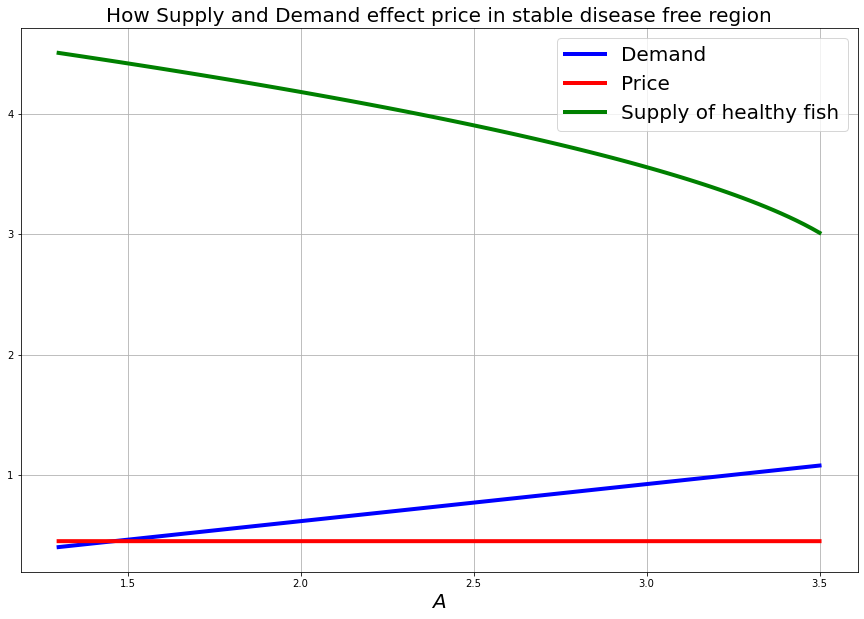

In [92]:
Arange=np.linspace(1.3,3.5,100)
plt.figure(figsize=(15,10))
vals=np.zeros((100,3))
i=0
for A in Arange:
    fp=disfreefixed_point2(K,lam,tau,A)
    Demand=A/(1+B*fp[3])
    vals[i,1]=fp[3]
    vals[i,2]=fp[0]
    vals[i,0]=Demand
    i+=1
plt.plot(Arange,vals[:,0],color='blue',label='Demand',lw=4)
plt.plot(Arange,vals[:,1],color='red',label='Price',lw=4)
plt.plot(Arange,vals[:,2],color='green',label='Supply of healthy fish',lw=4)
plt.legend(prop = { "size": 20 })
plt.xlabel('$A$',size=20)
plt.title('How Supply and Demand effect price in stable disease free region',size=20)
plt.grid()
#plt.savefig('supply demand disease free region A')

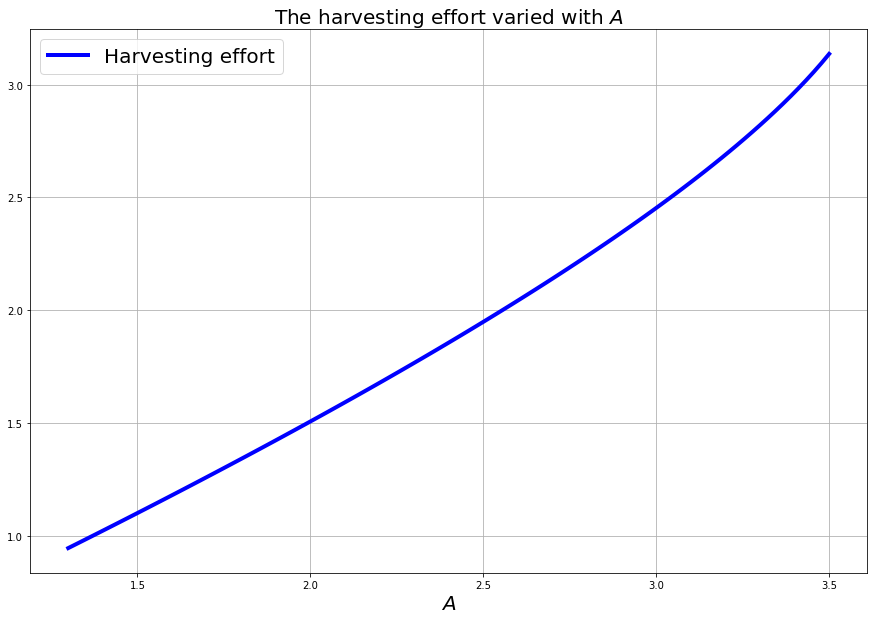

In [93]:
Arange=np.linspace(1.3,3.5,100)
plt.figure(figsize=(15,10))
vals=np.zeros((100,3))
i=0
for A in Arange:
    fp=disfreefixed_point2(K,lam,tau,A)
    Demand=A/(1+B*fp[3])
    vals[i,1]=fp[2]
    vals[i,2]=taxpaidhealthyfish
    vals[i,0]=Demand
    i+=1
#plt.plot(Arange,vals[:,0],color='blue',label='Demand',lw=4)
plt.plot(Arange,vals[:,1],color='blue',label='Harvesting effort',lw=4)
#plt.plot(Arange,vals[:,2],color='green',label='Supply of healthy fish',lw=4)
plt.legend(prop = { "size": 20 })
plt.xlabel('$A$',size=20)
plt.title('The harvesting effort varied with $A$',size=20)
plt.grid()
#plt.savefig('Harvesting effort A')

# Replicating the fixed points in the system

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns

# Constants

r=0.9
D1=4
D2=4.8
q1=0.8
mu=0.05
q2=0.9
c=0.05
B=5
phi1=0.1
phi2=0.15
p=0.05

# Variables

K=5
A=0.9
tau=0.45
lam=0.02

def ODEs(t,u):
    return [r*u[0]*(1-(u[0]+u[1])/K)-lam*u[0]*u[1]-((q1*u[0]*u[2])/(u[0]+D1)),
            lam*u[0]*u[1]-mu*u[1]-(q2*u[1]*u[2])/(u[1]+D2),
           phi1*u[2]*((q1*(u[3]-tau)*u[0])/(u[0]+D1)+(q2*(p-tau)*u[1])/(u[1]+D2)-c),
           phi2*u[3]*(A/(1+B*u[3])-(q1*u[0]*u[2])/(u[0]+D1))]

# Initial Conditions

con1=np.array([2,1.5,0.8,0.5])
con2=np.array([3,2.5,1.8,1.5])
con3=np.array([5,3.5,2.8,2.5])
con4=np.array([4,2.7,1.2,1.8])
con5=np.array([4,2.7,0,0])
allcon=np.array([con1,con2,con3,con4])
eq3con=np.array([mu/lam,r*(lam*K-mu)/(lam*(r+K*lam)),0,0])

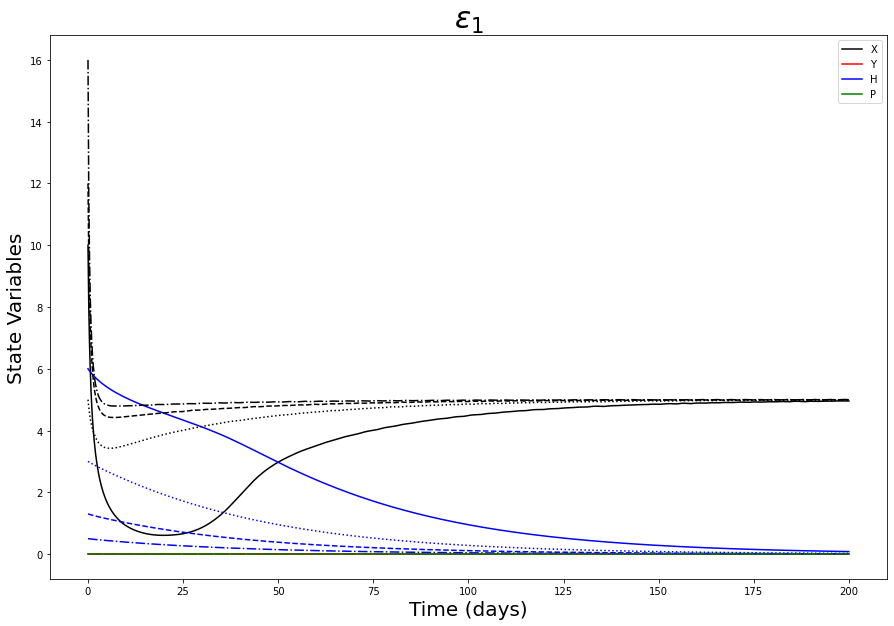

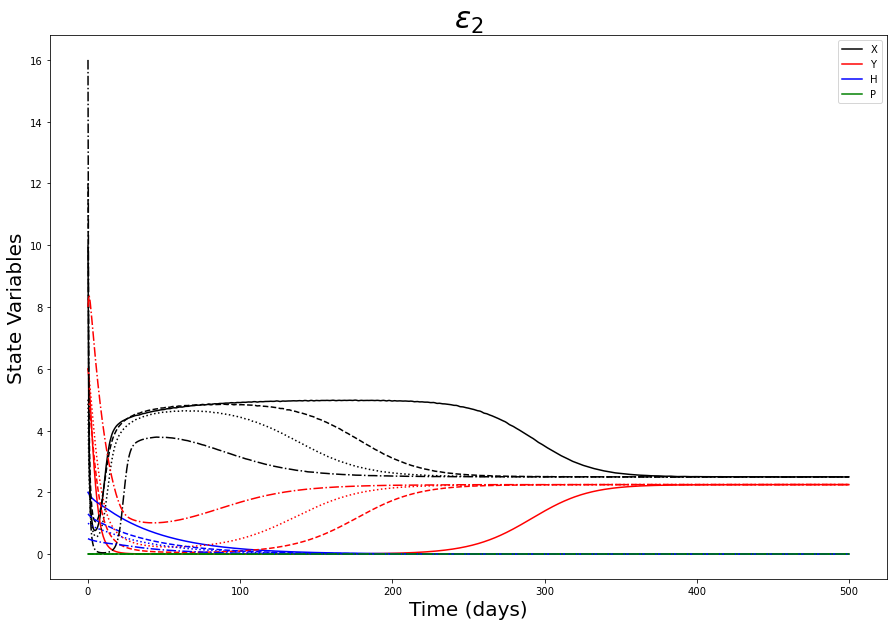

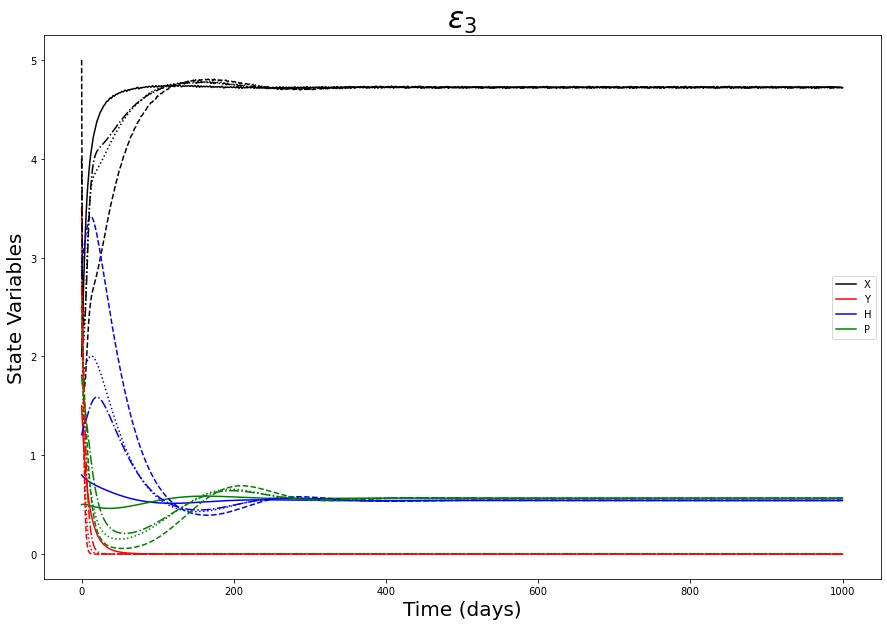

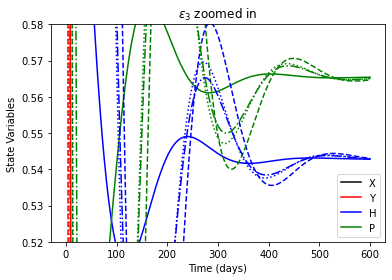

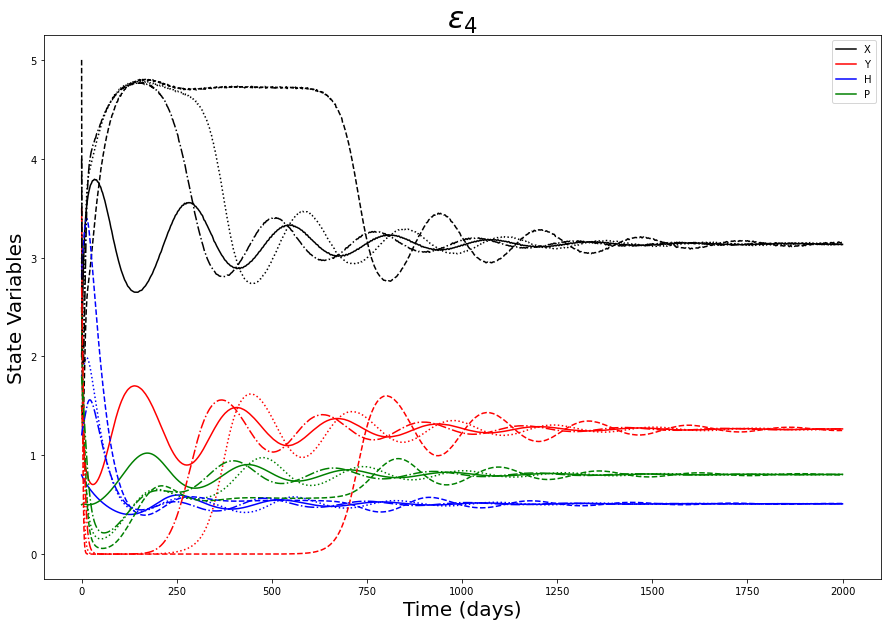

In [95]:

#initial conditions for second fixed point
con1=np.array([10,6,2,0])
con2=np.array([5,6,1,0])
con3=np.array([12,5,1.3,0])
con4=np.array([16,8,0.5,0])
# Initial conditions for first fixed point
con12=np.array([10,0,6,0])
con22=np.array([5,0,3,0])
con32=np.array([12,0,1.3,0])
con42=np.array([16,0,0.5,0])
initcons=np.array([con1,con2,con3,con4])
initcons2=np.array([con12,con22,con32,con42])
linestyle=np.array(['solid','dotted','dashed','dashdot'])
lam=0.02
def plotgraphs(initcons,time,index):
    i=0
    while(i<initcons.shape[0]):
        t_span=np.array([0,time])
        times=np.linspace(t_span[0],t_span[1],1001)
        soln=solve_ivp(ODEs,t_span,initcons[i,:],t_eval=times)
        t=soln.t
        X=soln.y[0]
        Y=soln.y[1]
        H=soln.y[2]
        P=soln.y[3]
        if (i==0):
            plt.plot(t,X,color='black',label='X',linestyle=linestyle[i])
            plt.plot(t,Y,color='red',label='Y',linestyle=linestyle[i])
            plt.plot(t,H,color='blue',label='H',linestyle=linestyle[i])
            plt.plot(t,P,color='green',label='P',linestyle=linestyle[i])
            plt.legend()
        else:
            plt.plot(t,X,color='black',label='X',linestyle=linestyle[i])
            plt.plot(t,Y,color='red',label='Y',linestyle=linestyle[i])
            plt.plot(t,H,color='blue',label='H',linestyle=linestyle[i])
            plt.plot(t,P,color='green',label='P',linestyle=linestyle[i])
        plt.ylabel('State Variables',size=20)
        plt.xlabel('Time (days)',size=20)
        if (index==0):
            plt.title('$\epsilon_1$',size=30)
        elif (index==1):
            plt.title('$\epsilon_2$',size=30)
        elif (index==2):
            plt.title('$\epsilon_3$',size=30)
        i+=1   


plt.figure(figsize=(15,10))
plotgraphs(initcons2,200,0)
plt.figure(figsize=(15,10))
plotgraphs(initcons,500,1)
plt.figure(figsize=(15,10))
plotgraphs(allcon,1000,2)

#plt.savefig('First Fixed point')

# Zoom IN

K=5
A=0.9
tau=0.45
lam=0.02
t_span=np.array([0,600])
times=np.linspace(t_span[0],t_span[1],601)

linestyle=np.array(['solid','dotted','dashed','dashdot'])
def plotgraphs(initcons):
    i=0
    while(i<initcons.shape[0]):
        soln=solve_ivp(ODEs,t_span,initcons[i,:],t_eval=times)
        t=soln.t
        X=soln.y[0]
        Y=soln.y[1]
        H=soln.y[2]
        P=soln.y[3]
        if (i==0):
            plt.plot(t,X,color='black',label='X',linestyle=linestyle[i])
            plt.plot(t,Y,color='red',label='Y',linestyle=linestyle[i])
            plt.plot(t,H,color='blue',label='H',linestyle=linestyle[i])
            plt.plot(t,P,color='green',label='P',linestyle=linestyle[i])
            plt.legend()
        else:
            plt.plot(t,X,color='black',label='X',linestyle=linestyle[i])
            plt.plot(t,Y,color='red',label='Y',linestyle=linestyle[i])
            plt.plot(t,H,color='blue',label='H',linestyle=linestyle[i])
            plt.plot(t,P,color='green',label='P',linestyle=linestyle[i])
        plt.ylabel('State Variables')
        plt.xlabel('Time (days)')
        plt.title('$\epsilon_3$ zoomed in')
        plt.ylim((0.52,0.58))
        i+=1   
plt.figure()
plotgraphs(allcon)
#plt.savefig('lam=0.02zoomed.png')
#plotgraphs(allcon)
#plt.savefig('lam=0.02zoomed.png')

# $\lambda=0.04$  $K=5$ $A=0.9$ $\tau=0.45$

K=5
A=0.9
tau=0.45
lam=0.04
t_span=np.array([0,2000])
times=np.linspace(t_span[0],t_span[1],2001)

linestyle=np.array(['solid','dotted','dashed','dashdot'])
lam=0.04
def plotgraphs(initcons):
    i=0
    while(i<initcons.shape[0]):
        soln=solve_ivp(ODEs,t_span,initcons[i,:],t_eval=times)
        t=soln.t
        X=soln.y[0]
        Y=soln.y[1]
        H=soln.y[2]
        P=soln.y[3]
        if (i==0):
            plt.plot(t,X,color='black',label='X',linestyle=linestyle[i])
            plt.plot(t,Y,color='red',label='Y',linestyle=linestyle[i])
            plt.plot(t,H,color='blue',label='H',linestyle=linestyle[i])
            plt.plot(t,P,color='green',label='P',linestyle=linestyle[i])
            plt.legend()
        else:
            plt.plot(t,X,color='black',label='X',linestyle=linestyle[i])
            plt.plot(t,Y,color='red',label='Y',linestyle=linestyle[i])
            plt.plot(t,H,color='blue',label='H',linestyle=linestyle[i])
            plt.plot(t,P,color='green',label='P',linestyle=linestyle[i])
        plt.ylabel('State Variables',size=20)
        plt.xlabel('Time (days)',size=20)
        plt.title('$\epsilon_4$',size=30)
        i+=1   

plt.figure(figsize=(15,10))
plotgraphs(allcon)
#plt.savefig('fourth fixed point.png')

# Examining improved model vs old model

(0.0, 2.0)

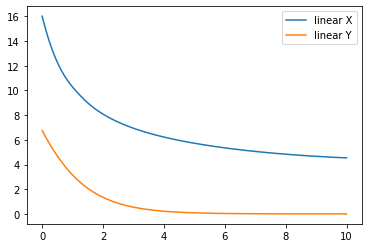

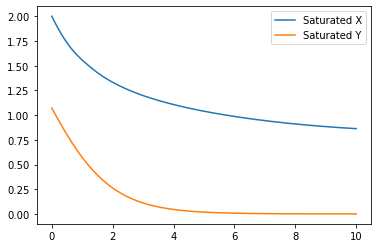

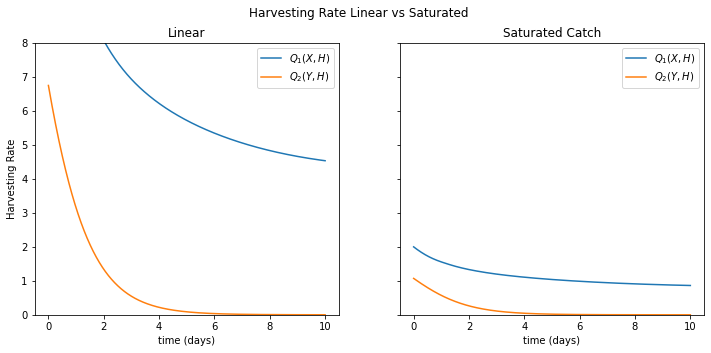

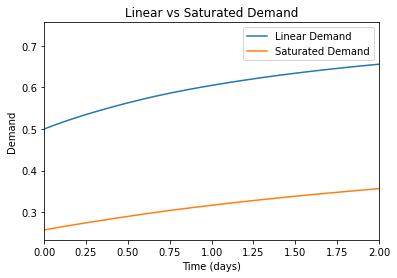

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns

# Constants

r=0.9
D1=4
D2=4.8
q1=0.8
mu=0.05
q2=0.9
c=0.05
B=5
phi1=0.1
phi2=0.15
p=0.05

# Variables

K=5
A=0.9
tau=0.45
lam=0.02

 # ODE

def ODEs(t,u):
    return [r*u[0]*(1-(u[0]+u[1])/K)-lam*u[0]*u[1]-((q1*u[0]*u[2])/(u[0]+D1)),
            lam*u[0]*u[1]-mu*u[1]-(q2*u[1]*u[2])/(u[1]+D2),
           phi1*u[2]*((q1*(u[3]-tau)*u[0])/(u[0]+D1)+(q2*(p-tau)*u[1])/(u[1]+D2)-c),
           phi2*u[3]*(A/(1+B*u[3])-(q1*u[0]*u[2])/(u[0]+D1))]

# Initial Conditions

test=np.array([4,1.5,5,0.5])

t_span=np.array([0,10])
times=np.linspace(t_span[0],t_span[1],1001)

soln=solve_ivp(ODEs,t_span,test,t_eval=times)
t=soln.t
X=soln.y[0]
Y=soln.y[1]
H=soln.y[2]
P=soln.y[3]

def LinearHarvestX(X,Y,H,P):
    return q1*X*H
def SaturatedHarvestX(X,Y,H,P):
    return q1*X*H/(X+D1)
def LinearHarvestY(X,Y,H,P):
    return q2*Y*H
def SaturatedHarvestY(X,Y,H,P):
    return q2*Y*H/(Y+D2)


plt.figure()
plt.plot(t,LinearHarvestX(X,Y,H,P),label='linear X')
plt.plot(t,LinearHarvestY(X,Y,H,P),label='linear Y')
plt.legend()
plt.figure()
plt.plot(t,SaturatedHarvestX(X,Y,H,P),label='Saturated X')
plt.plot(t,SaturatedHarvestY(X,Y,H,P),label='Saturated Y')
plt.legend()

fig,axs=plt.subplots(1,2,figsize=(12,5),sharey=True)

fig.suptitle('Harvesting Rate Linear vs Saturated')
axs[0].plot(t,LinearHarvestX(X,Y,H,P),label='$Q_1(X,H)$')
axs[0].set_ylabel('Harvesting Rate')
axs[0].plot(t,LinearHarvestY(X,Y,H,P),label='$Q_2(Y,H)$')
axs[0].set_xlabel('time (days)')
axs[0].legend()
axs[0].set_title('Linear')
axs[1].set_title('Saturated Catch')
axs[1].plot(t,SaturatedHarvestX(X,Y,H,P),label='$Q_1(X,H)$')
axs[1].plot(t,SaturatedHarvestY(X,Y,H,P),label='$Q_2(Y,H)$')
axs[1].legend()
axs[1].set_xlabel('time (days)')
axs[0].set_ylim((0,8))
#plt.savefig('Linear vs Saturated Catch')

alpha=0.8
def lineardemand(X,Y,H,P):
    return A-alpha*P
def Saturateddemand(X,Y,H,P):
    return A/(1+B*P)

test=np.array([6,3,6,0.5])
t_span=np.array([0,10])
times=np.linspace(t_span[0],t_span[1],1001)

soln=solve_ivp(ODEs,t_span,test,t_eval=times)
t=soln.t
X=soln.y[0]
Y=soln.y[1]
H=soln.y[2]
P=soln.y[3]

plt.figure()
plt.plot(t,lineardemand(X,Y,H,P),label='Linear Demand')
plt.plot(t,Saturateddemand(X,Y,H,P),label='Saturated Demand')
plt.xlabel('Time (days)')
plt.ylabel('Demand')
plt.title('Linear vs Saturated Demand')
plt.legend()
plt.xlim((0,2))
#plt.ylim((0.2,0.8))
#plt.savefig('Linear vs Saturated Demand')

